***Assignment 2***

Shounak Das (21D070068)

Video:

Webm - https://drive.google.com/file/d/157OcJIDwSDtBHljgUGO3WiU38eb3MwIn/view?usp=sharing

mp4(with playback speed of 1.4x) - https://drive.google.com/file/d/1CDP_tO8bsjjJiytRGzui1Cr5pHDXWt_G/view?usp=sharing

First I will import all the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.svm import SVR,SVC
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error,accuracy_score,f1_score
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance


Q1(a,b)


In [2]:
red=pd.read_csv("wine/winequality-red.csv",delimiter=";") #Reading the Red Wine csv where values are separated by ;
white=pd.read_csv("wine/winequality-white.csv",delimiter=";") #Reading the White Wine csv where values are separated by ;

In [3]:
white

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [4]:
red

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
4         9.4        5  
...       ...      ...  
1594     10.5        5  
1595     11.2        6  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6  

[1599 rows x 12 columns]

In the next block we will check if the dataset has some missing values and the datatypes of different columns

In [5]:
print("Red:")
red.info()
print("White:")
white.info()

Red:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
White:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Co

Next we will see the stats(mean,min,max,standard dev) of the columns having numerical values

In [6]:
print("Red:")
red.describe() #For viewing the stats of different columns

Red:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
print("White:")
white.describe() #For viewing the stats of different columns

White:


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

Next we will plot the histograms of the different features to get an idea of their distributions

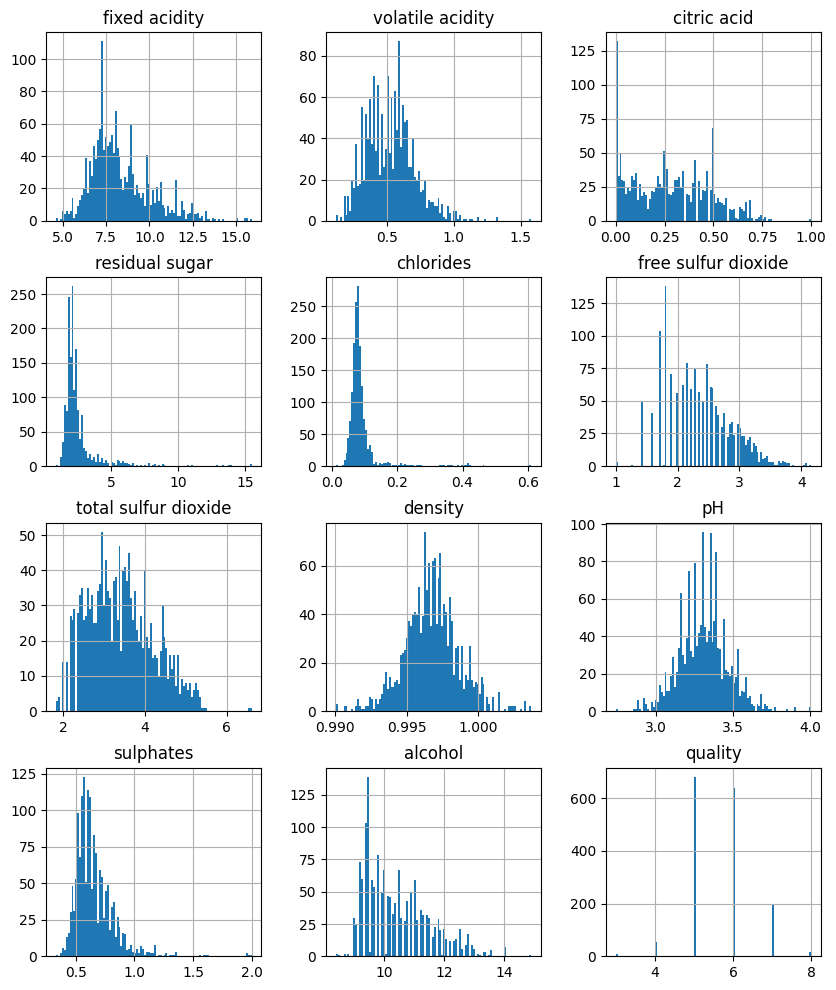

In [8]:

red['free sulfur dioxide'] = np.cbrt(red['free sulfur dioxide']) #Cuberoot to get a Gaussian like plot
red['total sulfur dioxide'] = np.cbrt(red['total sulfur dioxide'])  #Cuberoot to get a Gaussian like plot

red.hist(bins=100,figsize=(10,12))
plt.show()

Free and Total Sulfur Dioxide had a skewed distribution,so I took their cube roots for transforming them into a Gaussian like Distribution.

I tried different transformations for Citric Acid like log, exponential, sqrt, cube root but they were not beneficial in getting a Gaussian distribution, so I won't be changing it.

Rest of the features were showing a Gaussian Distribution, so I won't be applying any transformation on them.

Next we will plot the histograms of the different features in the White Wine dataset to get an idea of their distributions

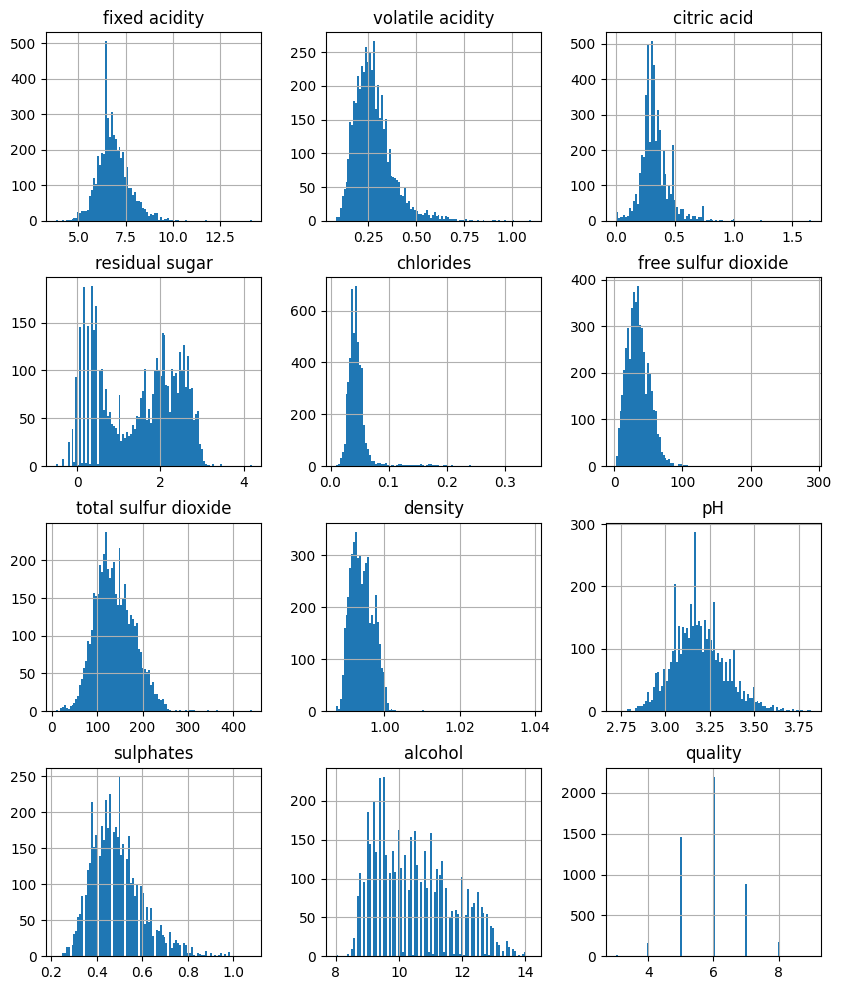

In [9]:
white['residual sugar'] = np.log(white['residual sugar'])  #log to get a Gaussian like plot

white.hist(bins=100,figsize=(10,12))
plt.show()

Residual Sugar had a skewed distribution,so I applied log transformation on it to get a Gaussian like Distribution.


Rest of the features were showing a Gaussian Distribution, so I won't be applying any transformation on them.

Now we will plot the Box Plots(for distribution and getting an idea of outliers) for each of the features in the Red Wine dataset

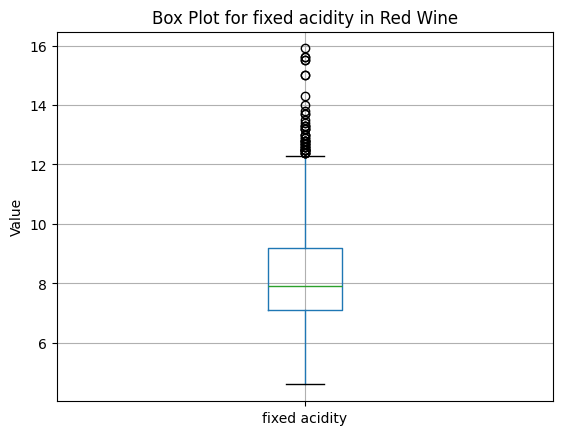

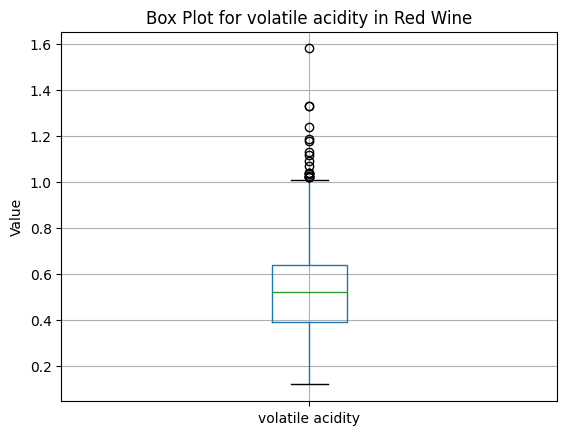

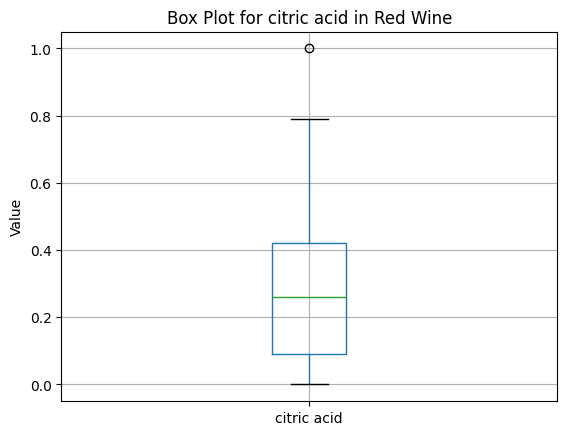

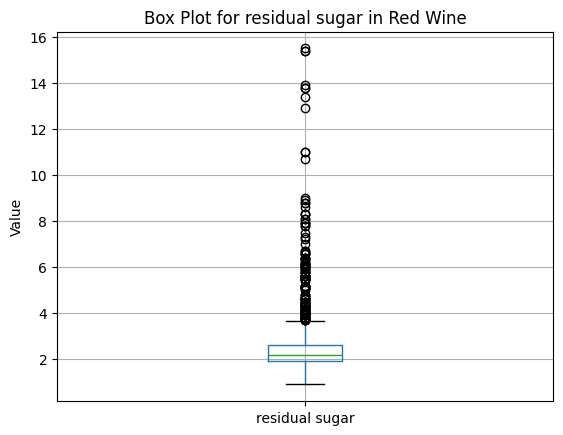

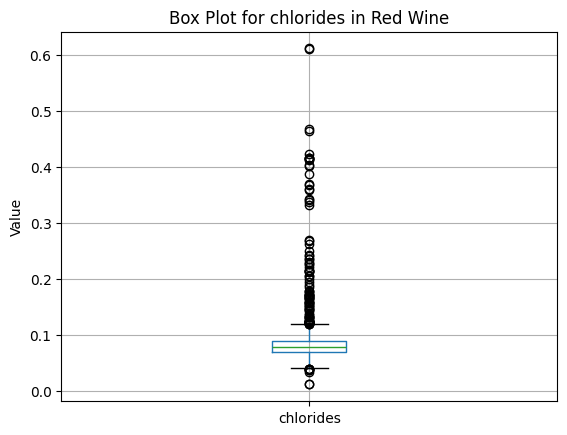

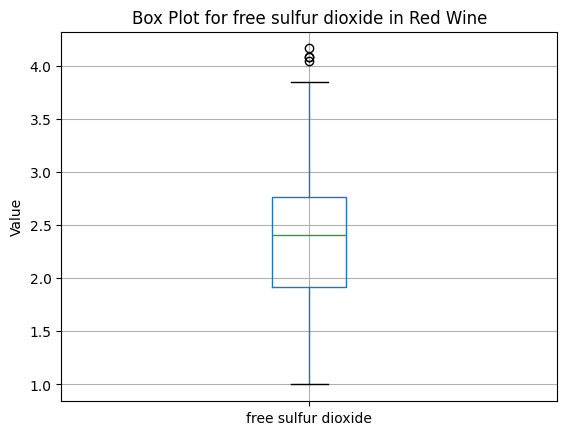

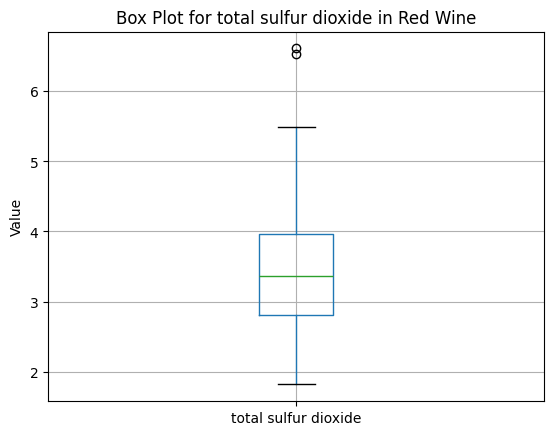

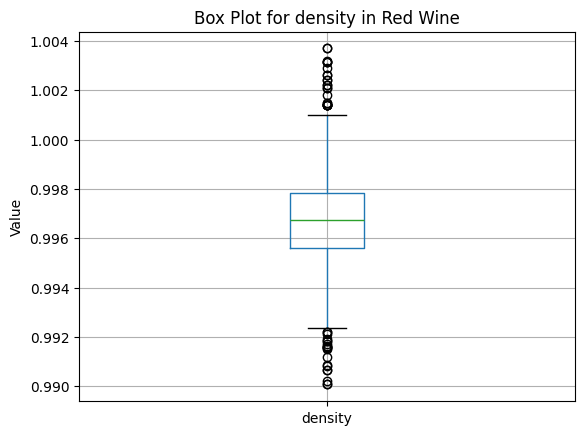

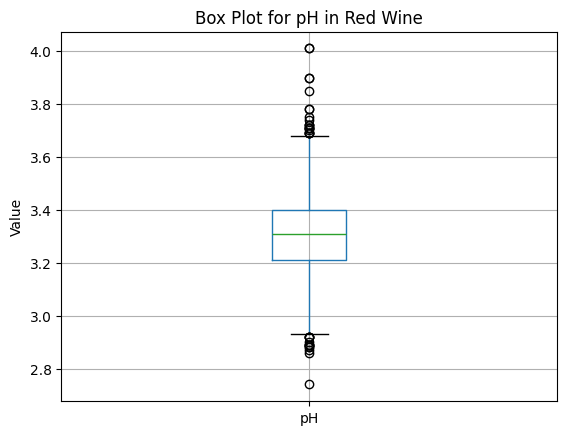

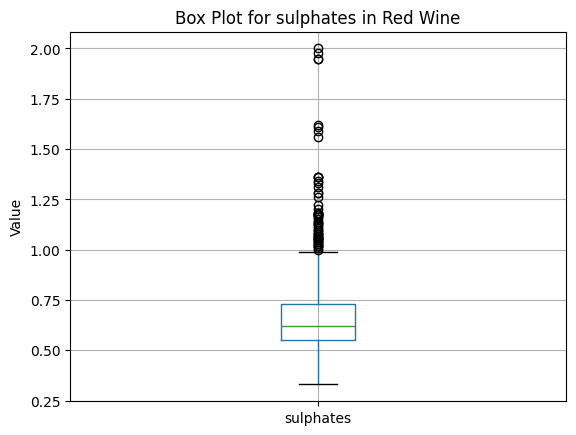

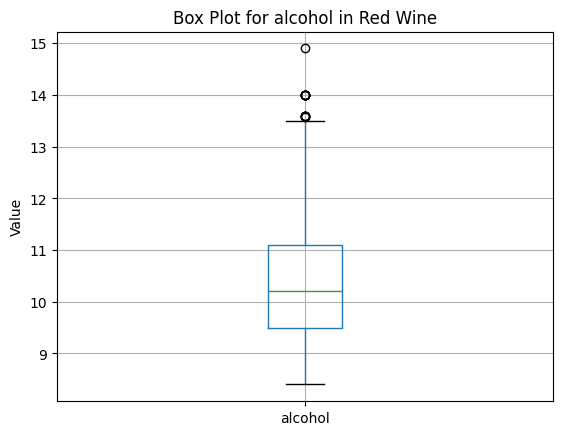

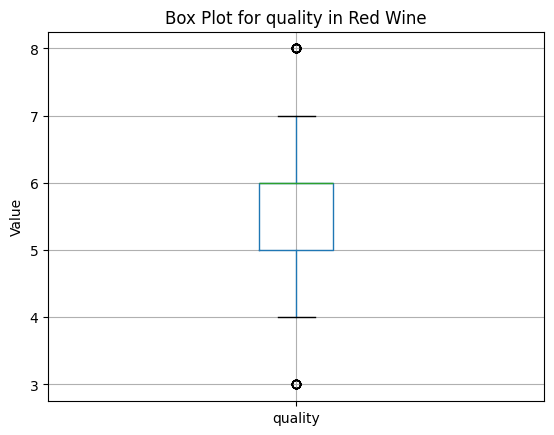

In [10]:
for column in red.columns:
    plt.figure()
    red.boxplot(column=[column])
    plt.title(f'Box Plot for {column} in Red Wine')
    plt.ylabel('Value')
plt.show()

Now we will plot the Box Plots(for distribution and getting an idea of outliers) for each of the features in the White Wine dataset

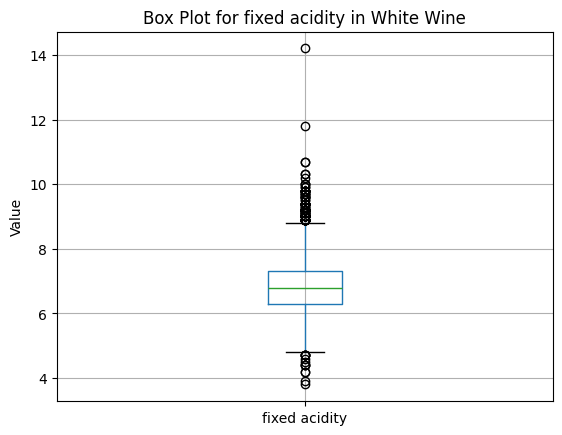

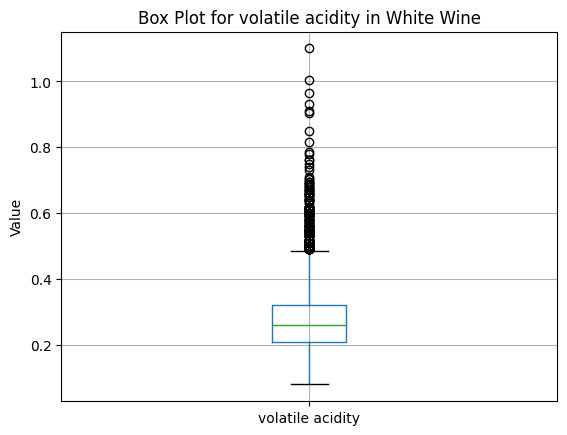

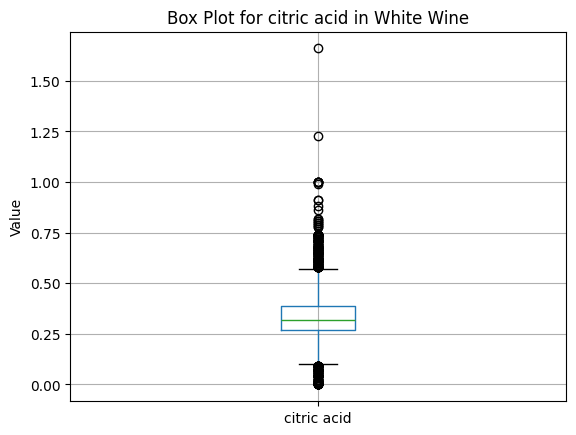

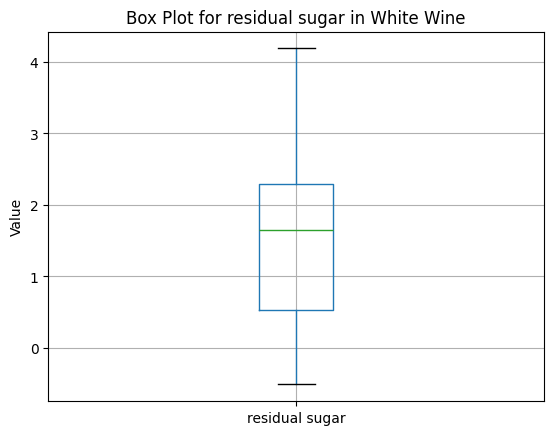

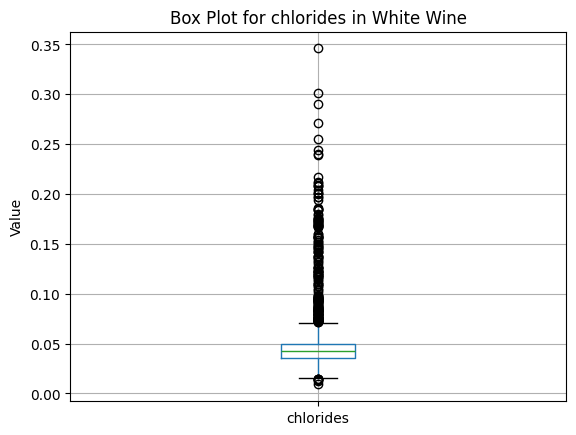

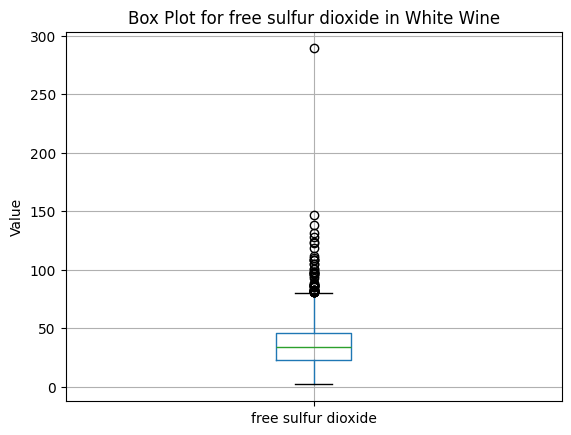

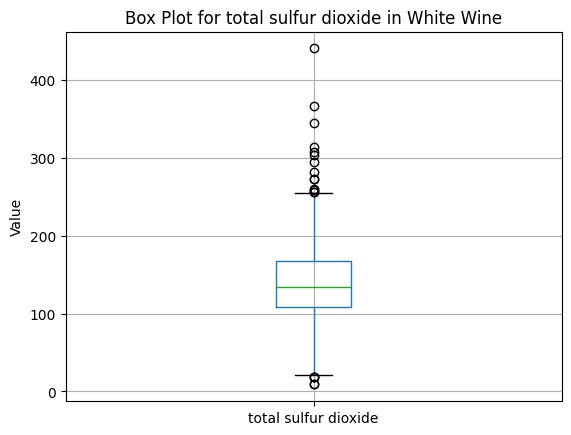

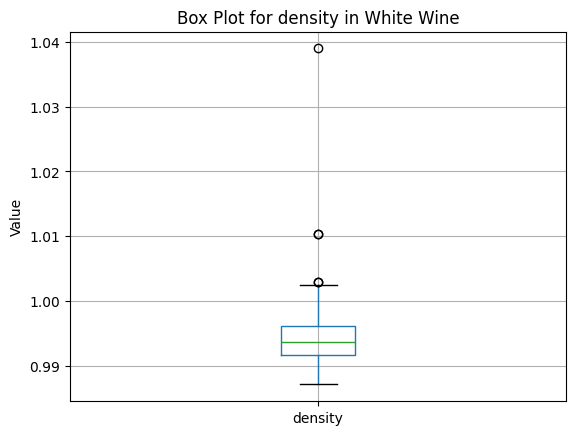

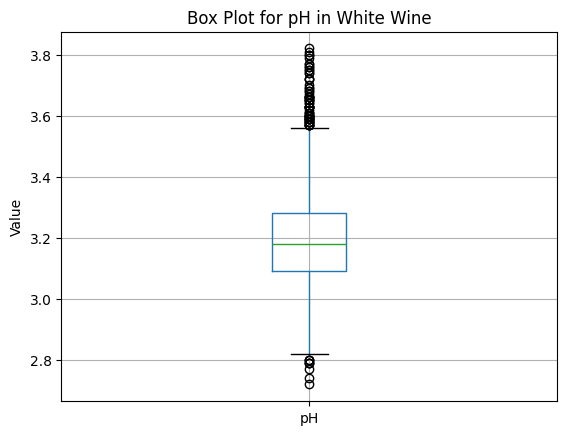

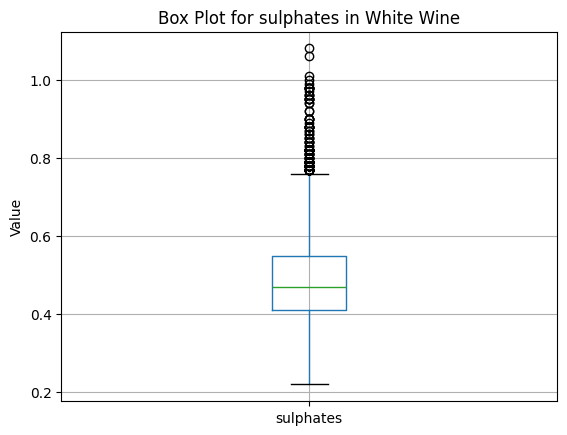

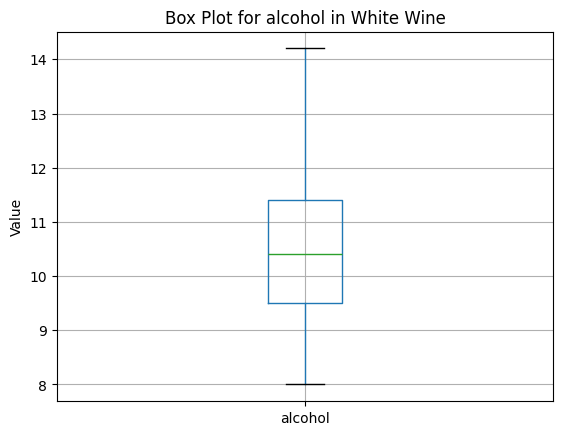

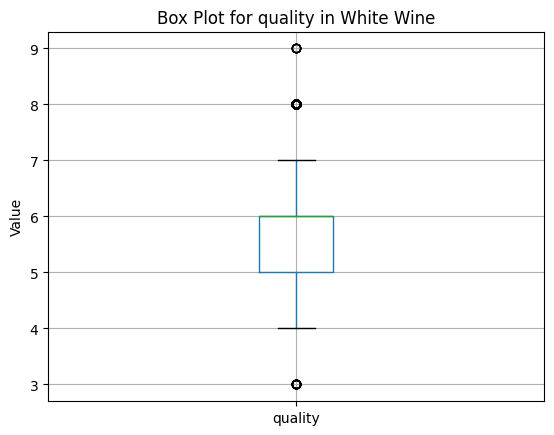

In [11]:
for column in white.columns:
    plt.figure()
    white.boxplot(column=[column])
    plt.title(f'Box Plot for {column} in White Wine')
    plt.ylabel('Value')
plt.show()

Next we will analyse the different features by looking at the variation in their values 

(Ref - Code shared by Prof. Amit Sethi)

In [12]:
print("Red:")
for col in red.columns.values: # For each column
  list_vals = pd.unique(red[col])    # Create a list of unique values
  print(col + ' has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 20: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])


print("White:")
for col in white.columns.values: # For each column
  list_vals = pd.unique(white[col])    # Create a list of unique values
  print(col + ' has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 20: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

Red:
fixed acidity has 96 unique values
volatile acidity has 143 unique values
citric acid has 80 unique values
residual sugar has 91 unique values
chlorides has 153 unique values
free sulfur dioxide has 60 unique values
total sulfur dioxide has 144 unique values
density has 436 unique values
pH has 89 unique values
sulphates has 96 unique values
alcohol has 65 unique values
quality has 6 unique values
  These are: 5, 6, 7, 4, 8, 3
White:
fixed acidity has 68 unique values
volatile acidity has 125 unique values
citric acid has 87 unique values
residual sugar has 310 unique values
chlorides has 160 unique values
free sulfur dioxide has 132 unique values
total sulfur dioxide has 251 unique values
density has 890 unique values
pH has 103 unique values
sulphates has 79 unique values
alcohol has 103 unique values
quality has 7 unique values
  These are: 6, 5, 7, 8, 4, 3, 9


According to the question, we will feed the chemical values as input to the model and predict the Rating(which lies between 3-8 in Red and 3-9 in White)

Also there are no missing values in the df

In [13]:
red['quality']=red['quality'].astype('int') #Converting quality into int as it only takes int values
white['quality']=white['quality'].astype('int') #Converting quality into int as it only takes int values
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int32
dtype: object

Next I will be normalising the data as a part of the pre-processing process

Red:


0         1         2         3         4         5         6   \
0    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.323303 -0.217554   
1    -0.298547  1.967442 -1.391472  0.043416  0.223875  0.983836  0.813317   
2    -0.298547  1.297065 -1.186070 -0.169427  0.096353  0.129002  0.459903   
3     1.654856 -1.384443  1.484154 -0.453218 -0.264960  0.325192  0.629351   
4    -0.528360  0.961877 -1.391472 -0.453218 -0.243707 -0.323303 -0.217554   
...        ...       ...       ...       ...       ...       ...       ...   
1594 -1.217796  0.403229 -0.980669 -0.382271  0.053845  1.452110  0.147087   
1595 -1.390155  0.123905 -0.877968 -0.240375 -0.541259  1.856199  0.370437   
1596 -1.160343 -0.099554 -0.723916 -0.169427 -0.243707  1.260746  0.008628   
1597 -1.390155  0.654620 -0.775267 -0.382271 -0.264960  1.452110  0.147087   
1598 -1.332702 -1.216849  1.021999  0.752894 -0.434990  0.417546  0.078957   

            7         8         9         10  
0     0.558274  1.288643 -0.579207 -0.960246  
1     0.028261 -0.719933  0.128950 -0.584777  
2     0.134264 -0.331177 -0.048089 -0.584777  
3     0.664277 -0.979104 -0.461180 -0.584777  
4     0.558274  1.288643 -0.579207 -0.960246  
...        ...       ...       ...       ...  
1594 -0.978765  0.899886 -0.461180  0.072294  
1595 -0.862162  1.353436  0.601055  0.729364  
1596 -0.533554  0.705508  0.542042  0.541630  
1597 -0.676657  1.677400  0.305990 -0.209308  
1598 -0.666057  0.511130  0.010924  0.541630  

[1599 rows x 11 columns]

Mean of the columns
0     3.554936e-16
1     1.733031e-16
2    -8.887339e-17
3    -1.244227e-16
4     3.732682e-16
5    -7.998605e-16
6     2.666202e-17
7    -3.473172e-14
8     2.861723e-15
9     6.754377e-16
10    1.066481e-16
dtype: float64


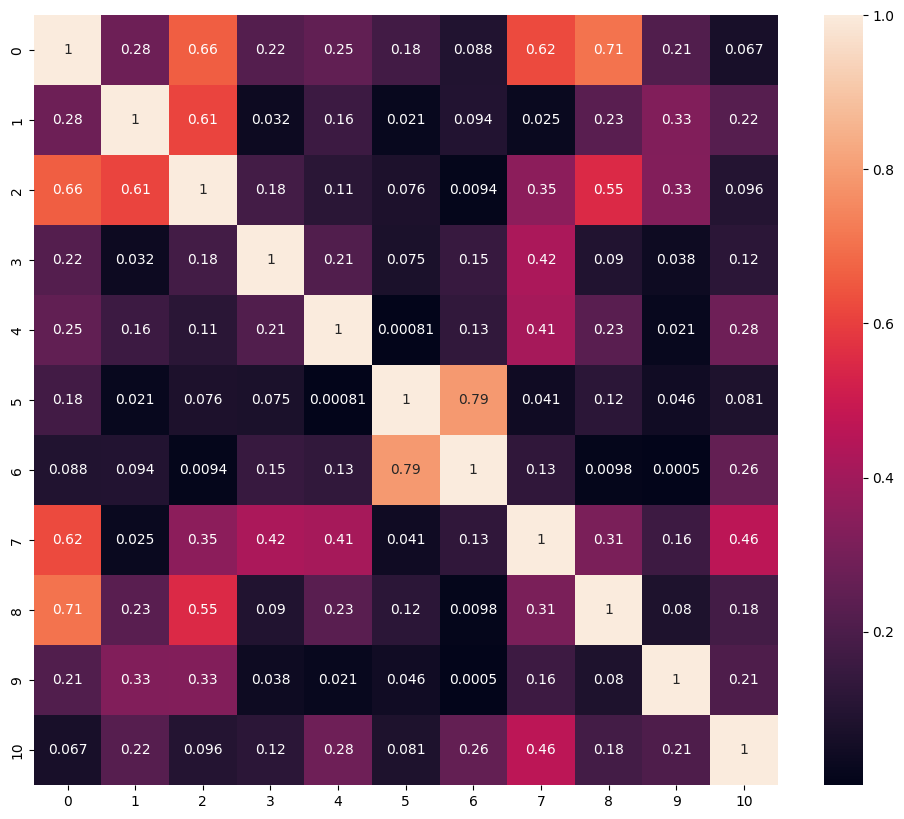

In [14]:
print("Red:")
scaler = preprocessing.StandardScaler() #Zero mean and unit variance normalization
scaler.fit(red.iloc[:, :-1]) #Applying the normalization
x_red=pd.DataFrame(scaler.transform(red.iloc[:, :-1])) #Normalizing all columns except the last column(quality) as it needs to remain discrete
y_red=pd.DataFrame(red['quality']) #Seperating the target column
display(x_red) #Display the normalized features
print('Mean of the columns')
print(x_red.mean()) #Mean would be very close to 0

corrMatrix = x_red.corr(method='spearman') #Correlation between the features
fig, ax = plt.subplots(figsize=(12,10)) #Plotting the correlation
sns.heatmap((abs(corrMatrix)), annot=True)
plt.show()

As we can see the mean values of the columns are very close to 0 (10^-16 ,10^-17....)

Also no feature pair has correlation greater than 0.9, so I will not be dropping any features

Next I will be normalising the data as a part of the pre-processing process on the White Wine dataset

White:


0         1         2         3         4         5         6   \
0     0.172097 -0.081770  0.213280  1.680903 -0.035355  0.569932  0.744565   
1    -0.657501  0.215896  0.048001 -1.096862  0.147747 -1.253019 -0.149685   
2     1.475751  0.017452  0.543838  0.488898  0.193523 -0.312141 -0.973336   
3     0.409125 -0.478657 -0.117278  0.715171  0.559727  0.687541  1.121091   
4     0.409125 -0.478657 -0.117278  0.715171  0.559727  0.687541  1.121091   
...        ...       ...       ...       ...       ...       ...       ...   
4893 -0.776015 -0.677101 -0.365197 -1.096862 -0.310008 -0.664970 -1.091000   
4894 -0.301959  0.414339  0.213280  0.649393  0.056196  1.275590  0.697499   
4895 -0.420473 -0.379435 -1.191592 -1.408999 -0.218457 -0.312141 -0.643875   
4896 -1.605613  0.116674 -0.282557 -1.503407 -1.088192 -0.900190 -0.667408   
4897 -1.013043 -0.677101  0.378559 -1.848932 -1.179743 -0.782580 -0.949803   

            7         8         9         10  
0     2.331512 -1.246921 -0.349184 -1.393152  
1    -0.009154  0.740029  0.001342 -0.824276  
2     0.358665  0.475102 -0.436816 -0.336667  
3     0.525855  0.011480 -0.787342 -0.499203  
4     0.525855  0.011480 -0.787342 -0.499203  
...        ...       ...       ...       ...  
4893 -0.965483  0.541334  0.088973  0.557282  
4894  0.291789 -0.253446 -0.261553 -0.743008  
4895 -0.497350 -1.313153 -0.261553 -0.905544  
4896 -1.784717  1.004955 -0.962605  1.857572  
4897 -1.543962  0.475102 -1.488394  1.044891  

[4898 rows x 11 columns]

Mean of the columns
0    -3.481630e-16
1     4.497106e-16
2     1.160543e-17
3    -1.740815e-17
4     3.133467e-16
5    -1.015476e-17
6    -4.642174e-17
7     3.247201e-14
8    -1.183754e-15
9    -8.218098e-16
10   -3.713739e-16
dtype: float64


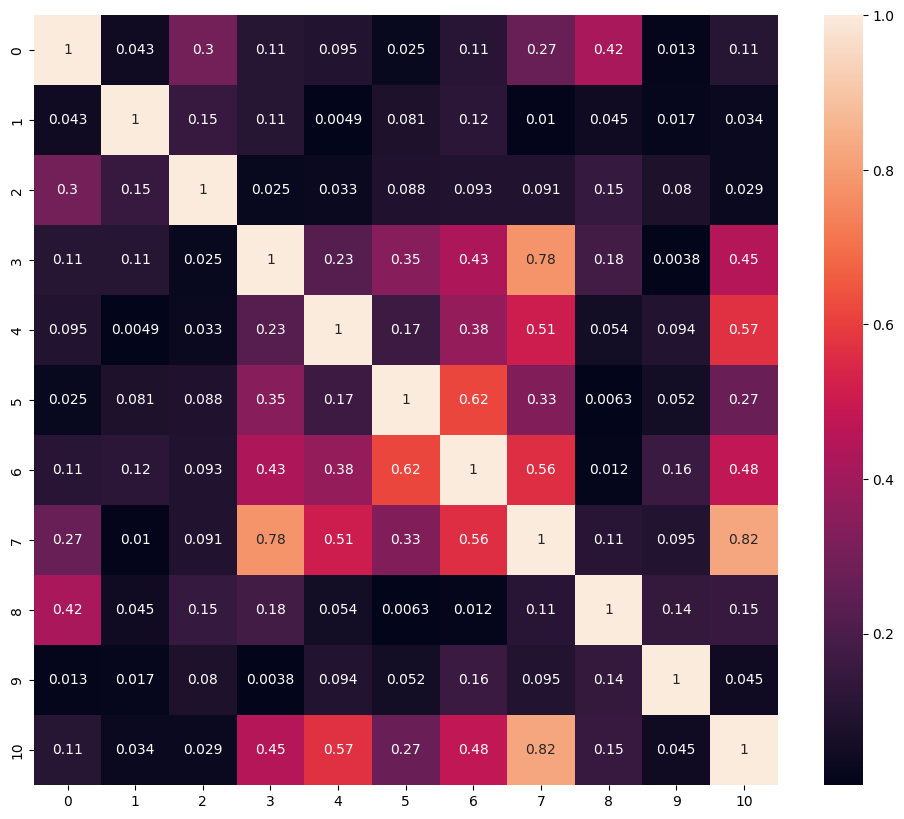

In [15]:
print("White:")
scaler = preprocessing.StandardScaler() #Zero mean and unit variance normalization
scaler.fit(white.iloc[:, :-1]) #Applying the normalization
x_white=pd.DataFrame(scaler.transform(white.iloc[:, :-1])) #Normalizing all columns except the last column(quality) as it needs to remain discrete
y_white=pd.DataFrame(white['quality']) #Seperating the target column
display(x_white) #Display the normalized features
print('Mean of the columns')
print(x_white.mean()) #Mean would be very close to 0

corrMatrix = x_white.corr(method='spearman') #Correlation between the features
fig, ax = plt.subplots(figsize=(12,10)) #Plotting the correlation
sns.heatmap((abs(corrMatrix)), annot=True)
plt.show()

As we can see the mean values of the columns are very close to 0 (10^-16 ,10^-17....)

Also no feature pair has correlation greater than 0.9, so I will not be dropping any features

Next we will look at the correlation of the features with the target(quality)

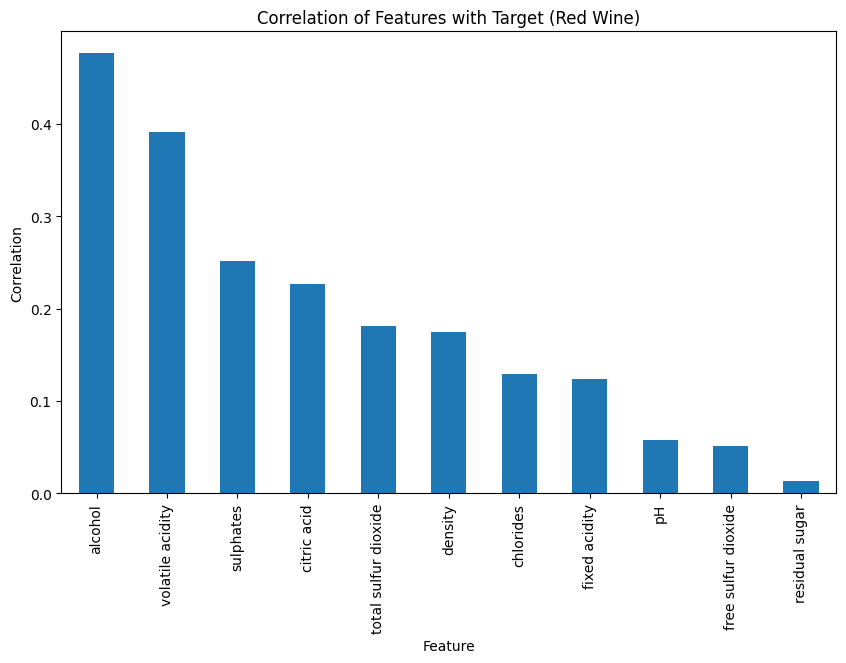

In [16]:
correlation_matrix = red.corr() #Correlation Matrix of the df
correlation_y = correlation_matrix['quality'].drop('quality')  #Removing correlation with itself
correlation_y = abs(correlation_y).sort_values(ascending=False) #Taking the mod of the correlation values and sorting in descending order
#Plot
plt.figure(figsize=(10, 6))
correlation_y.plot(kind='bar') #Bar Plot
plt.title('Correlation of Features with Target (Red Wine)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()


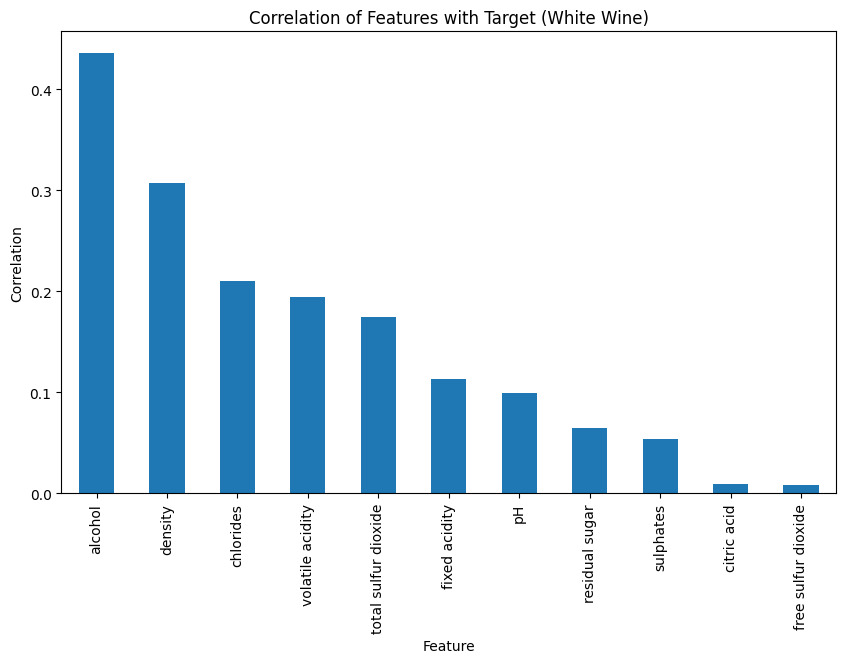

In [17]:
correlation_matrix = white.corr() #Correlation Matrix of the df
correlation_y_w = correlation_matrix['quality'].drop('quality')  #Removing correlation with itself
correlation_y_w = abs(correlation_y_w).sort_values(ascending=False) #Taking the mod of the correlation values and sorting in descending order
#Plot
plt.figure(figsize=(10, 6))
correlation_y_w.plot(kind='bar') #Bar Plot
plt.title('Correlation of Features with Target (White Wine)')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.show()

From the plots we can see that for both the datasets alcohol has a high correlation with target and thus is an useful feature

Apart from that:

Red- Volatile Acidity and Sulphates

White- Density and Chlorides

Q1(c)

(i)

In the next 2 cells I will be training and validating the train and val data respectively on different values of estimators and max depth, which are hyperparameters for the Random Forest Regressor, and then test on the best hyper-parameter pair for the Red Wine Dataset

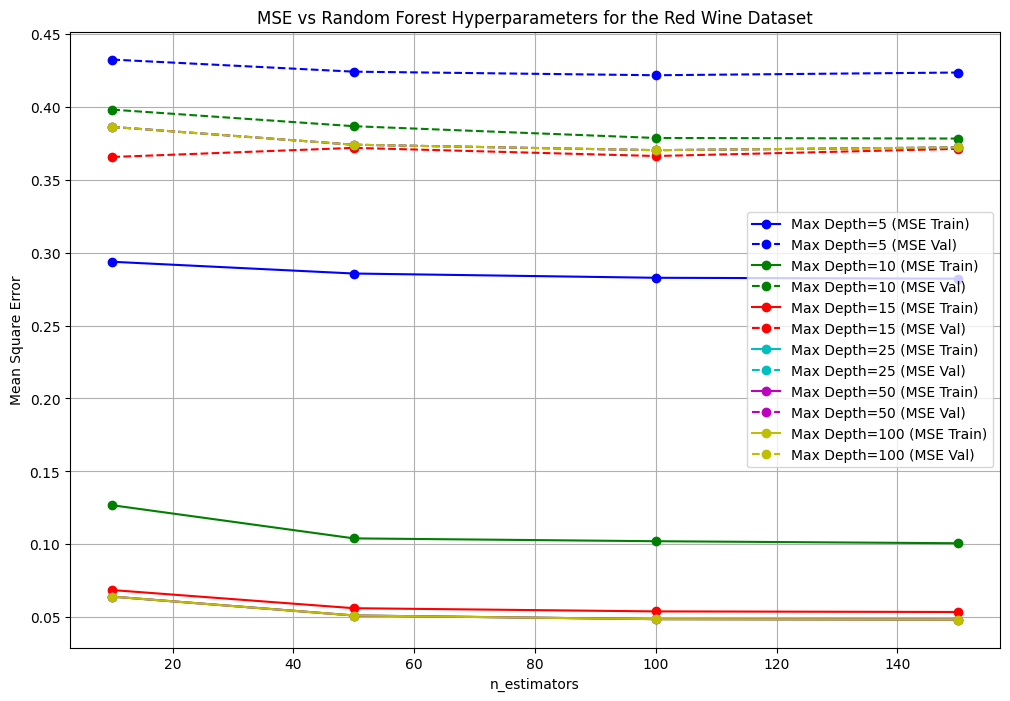

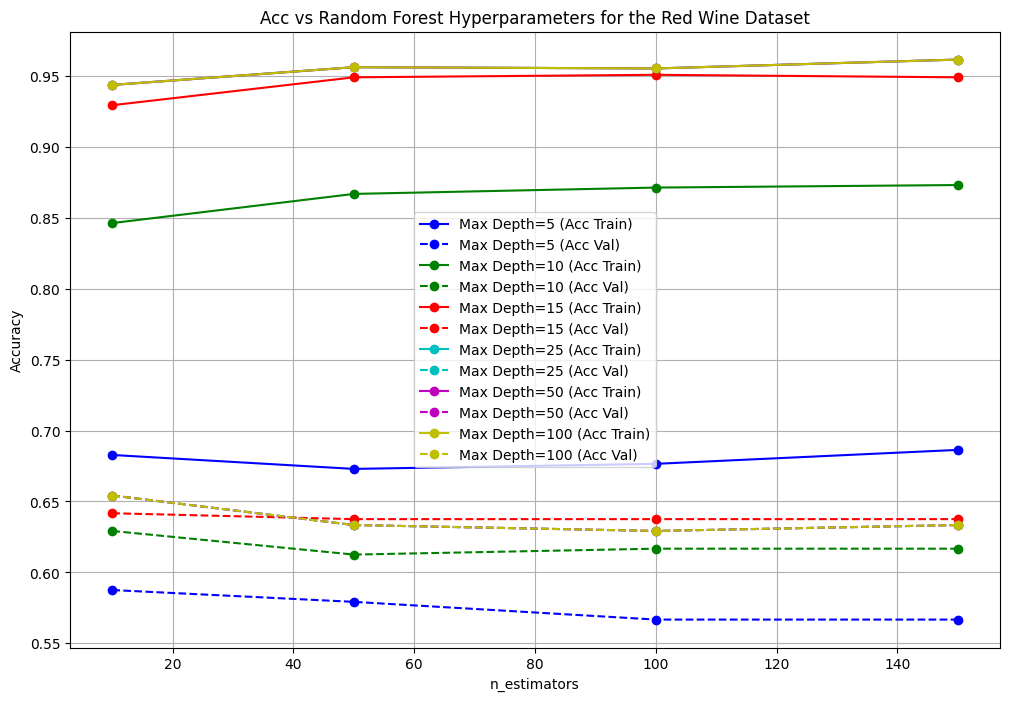

In [18]:
param_grid = {'n_estimators': [10,50, 100, 150], #Dictionary with the values of number of estimators to validate
              'max_depth': [5,10,15,25,50,100]}  #Values of max depth to validate

X_train_red, X_vt, y_train_red, y_vt = train_test_split(x_red, y_red['quality'], test_size=0.3, random_state=42)  #Splitting data into train and val+test
X_test_red, X_val_red, y_test_red, y_val_red = train_test_split(X_vt, y_vt, test_size=0.5, random_state=42) #Splitting rest data into test and val
#Train=70%, Val=0.5*0.3=15%, Test=30-15=15%

mse_values_val = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Val MSE for different params
mse_values_t = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Train MSE for different params
acc_values_val = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Val accuracies for different params
acc_values_t = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Train accuracies for different params

for n_estimators in param_grid['n_estimators']: #Iterate over different values of number of estimators
    for max_depth in param_grid['max_depth']: #Iterate over different values of max depth
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)  #Define RFR with those hyper-params
        rf.fit(X_train_red, y_train_red)  #Train the RFR on training data
        y_pred_train = rf.predict(X_train_red)  #Make predictions on training data
        y_pred_val = rf.predict(X_val_red) #Make predictions on validation data
        mse_values_val[max_depth].append(mean_squared_error(y_val_red, y_pred_val))  #Store the val MSE
        mse_values_t[max_depth].append(mean_squared_error(y_train_red, y_pred_train))  #Store the train MSE
        y_pred_train = np.clip(np.round(y_pred_train), 3, 8) #Limit the prediction in 3-8 as input data only has those values
        y_pred_val = np.clip(np.round(y_pred_val), 3, 8)  #Limit the prediction in 3-8 as input data only has those values
        acc_values_val[max_depth].append(accuracy_score(y_val_red, y_pred_val)) #Store the val accuracies
        acc_values_t[max_depth].append(accuracy_score(y_train_red, y_pred_train))  #Store the train accuracies

#Plot for MSE
colors = ['b', 'g', 'r', 'c', 'm', 'y'] #Define colors for lines of different max depth
plt.figure(figsize=(12, 8))
for i, max_depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], mse_values_t[max_depth], marker='o', color=colors[i], label=f'Max Depth={max_depth} (MSE Train)')
    plt.plot(param_grid['n_estimators'], mse_values_val[max_depth], marker='o', linestyle='dashed', color=colors[i], label=f'Max Depth={max_depth} (MSE Val)')
plt.xlabel('n_estimators')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Random Forest Hyperparameters for the Red Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

#Plot for accuracies
plt.figure(figsize=(12, 8))
for i, max_depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], acc_values_t[max_depth], marker='o', color=colors[i], label=f'Max Depth={max_depth} (Acc Train)')
    plt.plot(param_grid['n_estimators'], acc_values_val[max_depth], marker='o', linestyle='dashed', color=colors[i], label=f'Max Depth={max_depth} (Acc Val)')

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Acc vs Random Forest Hyperparameters for the Red Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

From the plot we can see that :

(i) Low values of max depth lead to lower train and val accuracy and higher MSE as compared to others(underfitting)

(ii) High values of max depth lead to higher train accuracy, lower train MSE but may give lower val accuracy and higher val MSE due to overfitting.

So we will be using that set of hyper-param which gives the lowest val MSE

In [19]:
min_mse=99999999  #Initialising mse with a large value and change it every time the mse<current mse
n_estimators=200  #Initialising n_estimators with max value in param grid and change it every time the mse<current mse
max_depth = 100  #Initialising max depth with max value in param grid and change it every time the mse<current mse

for max_d in param_grid['max_depth']:  #Iterate over all values of max depth then update
    for i, mse_val in enumerate(mse_values_val[max_d]):  #Iterate over the dictionary storing the val MSE
        if mse_val < min_mse:  #If new val MSE>previous lowest val MSE
            min_mse=mse_val  #Update MSE
            n_estimators=param_grid['n_estimators'][i]  #Update n_estimators
            max_depth=max_d  #Update max depth

print("Minimum MSE value:", min_mse)
print("Corresponding n_estimators:", n_estimators)
print("Corresponding max_depth:", max_depth)

best_rf_red=RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)  #Define a RFR with the hyper-params which gave the lowest val MSE on val data
best_rf_red.fit(X_train_red, y_train_red)  #Train that RFR on train data
y_pred_test=best_rf_red.predict(X_test_red)  #Make predictions on test data
print("Test MSE = ",mean_squared_error(y_test_red, y_pred_test))  #Print the MSE on test data
y_pred_test = np.clip(np.round(y_pred_test), 3, 8)#Limit the prediction in 3-8 as input data only has those values
print("Test Accuracy = ",accuracy_score(y_test_red, y_pred_test))  #Print the accuracy on test data

Minimum MSE value: 0.36562009230965037
Corresponding n_estimators: 10
Corresponding max_depth: 15
Test MSE =  0.3592408768137178
Test Accuracy =  0.5916666666666667


Here we can see that moderate values of n-estimators(10) and max depth(15) gives the lowest val MSE 

Also I had clipped the output to 3-8 as the input target values only had those values

In the next 2 cells I will be training and validating the train and val data respectively on different values of estimators and max depth, which are hyperparameters for the Random Forest Regressor, and then test on the best hyper-parameter pair for the White Wine Dataset

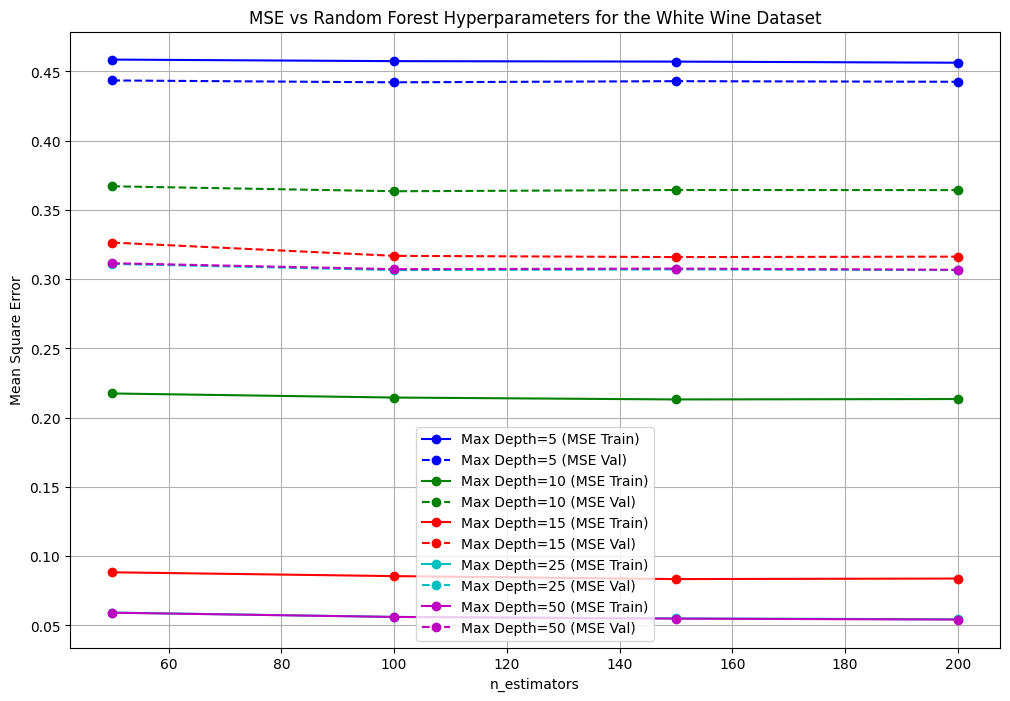

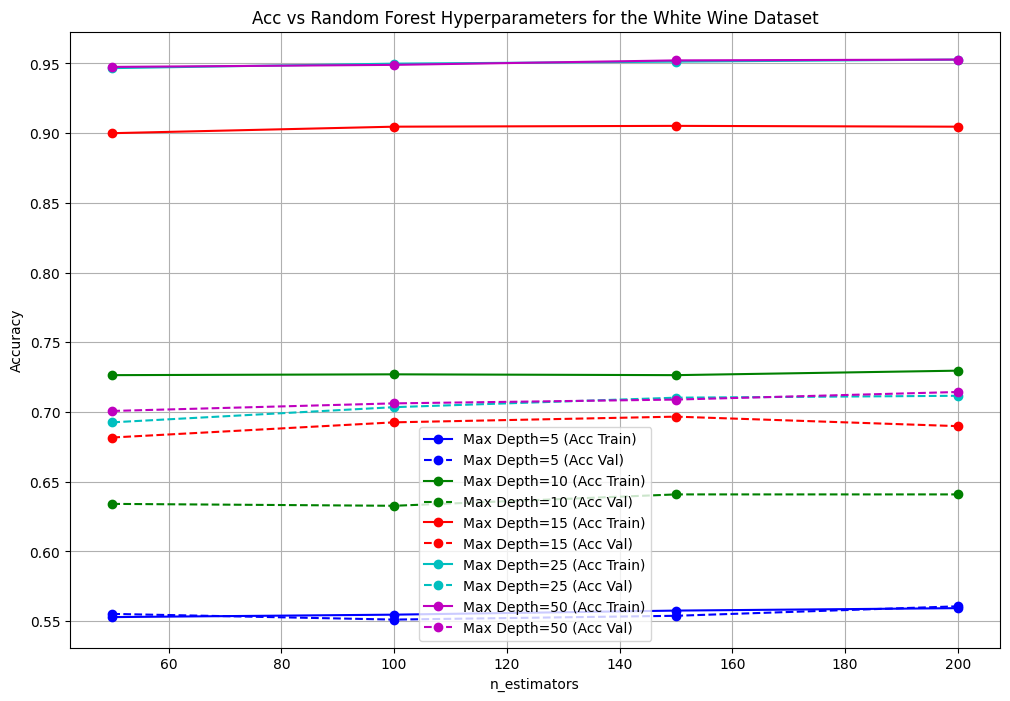

In [20]:
param_grid = {'n_estimators': [50, 100, 150, 200],  #Dictionary with the values of number of estimators to validate
              'max_depth': [5,10,15,25,50]}  #Dictionary with the values of max depth to validate

X_train_white, X_vt, y_train_white, y_vt = train_test_split(x_white, y_white['quality'], test_size=0.3, random_state=42)  #Splitting data into train and val+test
X_test_white, X_val_white, y_test_white, y_val_white = train_test_split(X_vt, y_vt, test_size=0.5, random_state=42) #Splitting rest data into test and val
#Train=70%, Val=0.5*0.3=15%, Test=30-15=15%

mse_values_val = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Val MSE for different params
mse_values_t = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Train MSE for different params
acc_values_val = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Val accuracies for different params
acc_values_t = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Train accuracies for different params

for n_estimators in param_grid['n_estimators']: #Iterate over different values of number of estimators
    for max_depth in param_grid['max_depth']: #Iterate over different values of max depth
        rf = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)  #Define RFR with those hyper-params
        rf.fit(X_train_white, y_train_white)  #Train the RFR on training data
        y_pred_train = rf.predict(X_train_white)  #Make predictions on training data
        y_pred_val = rf.predict(X_val_white) #Make predictions on validation data
        mse_values_val[max_depth].append(mean_squared_error(y_val_white, y_pred_val))  #Store the val MSE
        mse_values_t[max_depth].append(mean_squared_error(y_train_white, y_pred_train))  #Store the train MSE
        y_pred_train = np.clip(np.round(y_pred_train), 3, 9) #Limit the prediction in 3-9 as input data only has those values
        y_pred_val = np.clip(np.round(y_pred_val), 3, 9)  #Limit the prediction in 3-9 as input data only has those values
        acc_values_val[max_depth].append(accuracy_score(y_val_white, y_pred_val)) #Store the val accuracies
        acc_values_t[max_depth].append(accuracy_score(y_train_white, y_pred_train))  #Store the train accuracies

#Plot for MSE
colors = ['b', 'g', 'r', 'c', 'm', 'y'] #Define colors for lines of different max depth
plt.figure(figsize=(12, 8))
for i, max_depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], mse_values_t[max_depth], marker='o', color=colors[i], label=f'Max Depth={max_depth} (MSE Train)')
    plt.plot(param_grid['n_estimators'], mse_values_val[max_depth], marker='o', linestyle='dashed', color=colors[i], label=f'Max Depth={max_depth} (MSE Val)')
plt.xlabel('n_estimators')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Random Forest Hyperparameters for the White Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

#Plot for accuracies
plt.figure(figsize=(12, 8))
for i, max_depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], acc_values_t[max_depth], marker='o', color=colors[i], label=f'Max Depth={max_depth} (Acc Train)')
    plt.plot(param_grid['n_estimators'], acc_values_val[max_depth], marker='o', linestyle='dashed', color=colors[i], label=f'Max Depth={max_depth} (Acc Val)')

plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Acc vs Random Forest Hyperparameters for the White Wine Dataset')
plt.legend()
plt.grid(True)
plt.show()

From the plot we can see that :

(i) Low values of max depth lead to lower train and val accuracy and higher MSE as compared to others(underfitting)

(ii) High values of max depth lead to higher train accuracy, lower train MSE but may give lower val accuracy and higher val MSE due to overfitting.

So we will be using that set of hyper-param which gives the lowest val MSE

In [21]:
min_mse=99999999  #Initialising mse with a large value and change it every time the mse<current mse
n_estimators=200  #Initialising n_estimators with max value in param grid and change it every time the mse<current mse
max_depth = 50  #Initialising max depth with max value in param grid and change it every time the mse<current mse

for max_d in param_grid['max_depth']:  #Iterate over all values of max depth then update
    for i, mse_val in enumerate(mse_values_val[max_d]):  #Iterate over the dictionary storing the val MSE
        if mse_val < min_mse:  #If new val MSE>previous lowest val MSE
            min_mse=mse_val  #Update MSE
            n_estimators=param_grid['n_estimators'][i]  #Update n_estimators
            max_depth=max_d  #Update max depth

print("Minimum MSE value:", min_mse)
print("Corresponding n_estimators:", n_estimators)
print("Corresponding max_depth:", max_depth)

best_rf_white=RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)  #Define a RFR with the hyper-params which gave the lowest val MSE on val data
best_rf_white.fit(X_train_white, y_train_white)  #Train that RFR on train data
y_pred_test=best_rf_white.predict(X_test_white)  #Make predictions on test data
print("Test MSE = ",mean_squared_error(y_test_white, y_pred_test))  #Print the MSE on test data
y_pred_test = np.clip(np.round(y_pred_test), 3, 9)#Limit the prediction in 3-9 as input data only has those values
print("Test Accuracy = ",accuracy_score(y_test_white, y_pred_test))  #Print the accuracy on test data

Minimum MSE value: 0.3065243453721661
Corresponding n_estimators: 200
Corresponding max_depth: 25
Test MSE =  0.40710327982098626
Test Accuracy =  0.6530612244897959


Here we can see that moderate values of max depth(25) gives the lowest val MSE 

Also I had clipped the output to 3-9 as the input target values only had those values

Q1(c)
(ii)

Now we will repeat the same for SVR with RBF kernel by varying C and gamma for the Red Wine Dataset

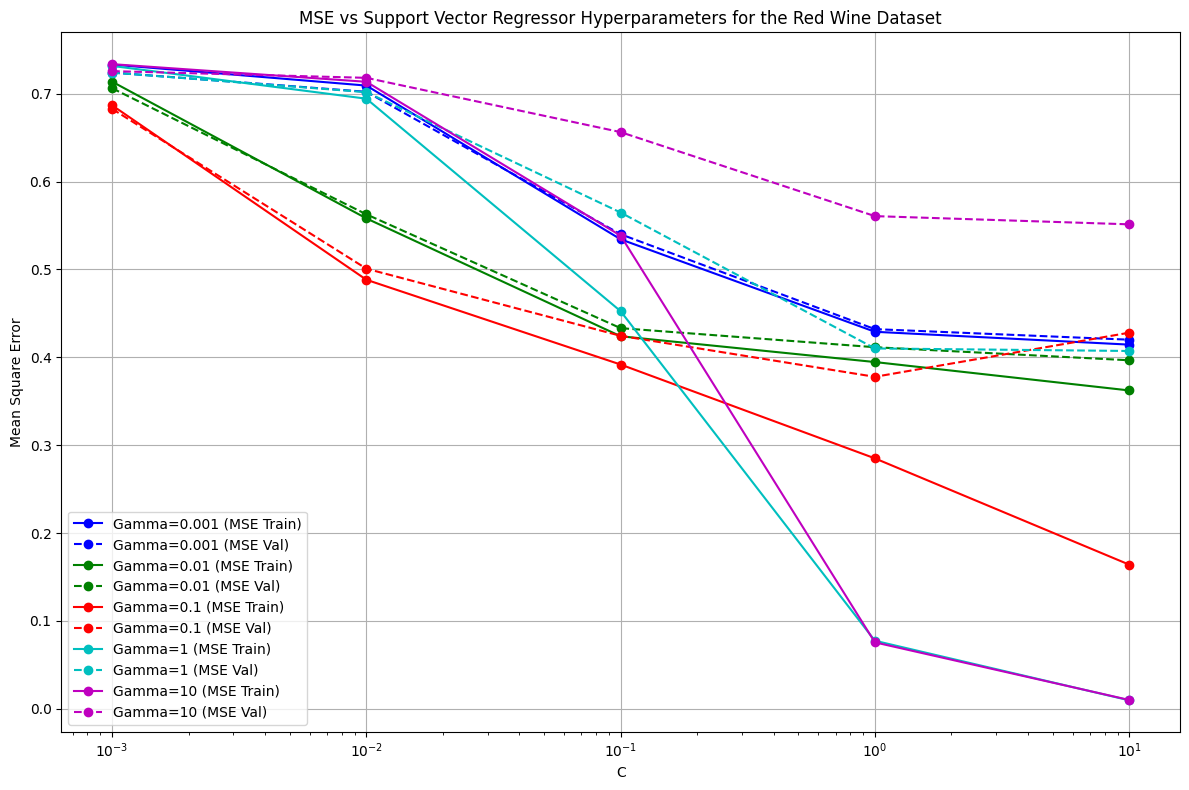

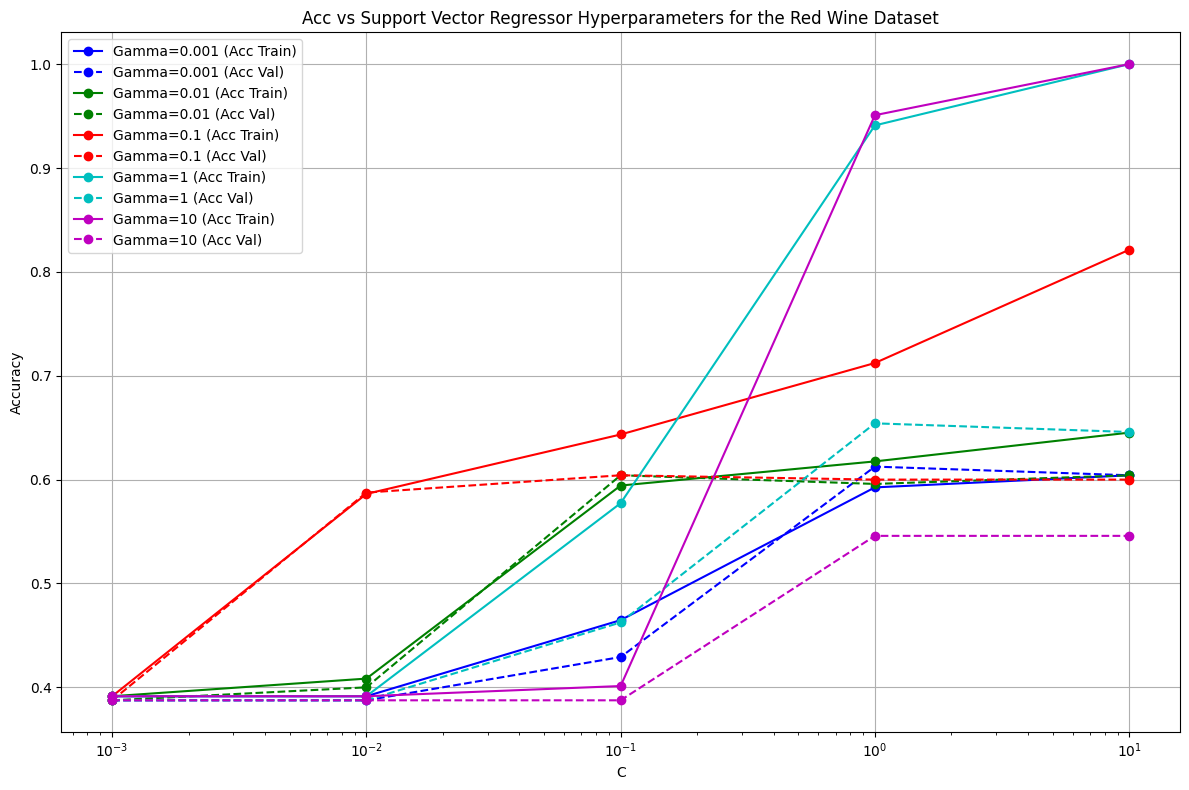

In [22]:
param_grid = {'C': [0.001,0.01,0.1, 1, 10], #Dictionary with the values of C to validate
              'gamma': [0.001,0.01, 0.1, 1, 10]}  #Values of gamma to validate

mse_values_val = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Val MSE for different params
mse_values_t = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Train MSE for different params
acc_values_val = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Val accuracies for different params
acc_values_t = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Train accuracies for different params

for C in param_grid['C']: #Iterate over different values of C
    for gamma in param_grid['gamma']: #Iterate over different values of gamma
        svr = SVR(kernel='rbf', C=C, gamma=gamma)  #Define SVR with those hyper-params
        svr.fit(X_train_red, y_train_red)  #Train the SVR on training data
        y_pred_train = svr.predict(X_train_red)  #Make predictions on training data
        y_pred_val = svr.predict(X_val_red) #Make predictions on validation data
        mse_values_val[gamma].append(mean_squared_error(y_val_red, y_pred_val))  #Store the val MSE
        mse_values_t[gamma].append(mean_squared_error(y_train_red, y_pred_train))  #Store the train MSE
        y_pred_train = np.clip(np.round(y_pred_train), 3, 8) #Limit the prediction in 3-8 as input data only has those values
        y_pred_val = np.clip(np.round(y_pred_val), 3, 8)  #Limit the prediction in 3-8 as input data only has those values
        acc_values_val[gamma].append(accuracy_score(y_val_red, y_pred_val)) #Store the val accuracies
        acc_values_t[gamma].append(accuracy_score(y_train_red, y_pred_train))  #Store the train accuracies

#Plot for MSE
colors = ['b', 'g', 'r', 'c', 'm', 'y'] #Define colors for lines of different max depth
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(param_grid['gamma']):
    plt.plot(param_grid['C'], mse_values_t[gamma], marker='o', color=colors[i], label=f'Gamma={gamma} (MSE Train)')
    plt.plot(param_grid['C'], mse_values_val[gamma], marker='o', linestyle='dashed', color=colors[i], label=f'Gamma={gamma} (MSE Val)')

plt.xlabel('C')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Support Vector Regressor Hyperparameters for the Red Wine Dataset')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot for Accuracies
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(param_grid['gamma']):
    plt.plot(param_grid['C'], acc_values_t[gamma], marker='o', color=colors[i], label=f'Gamma={gamma} (Acc Train)')
    plt.plot(param_grid['C'], acc_values_val[gamma], marker='o', linestyle='dashed', color=colors[i], label=f'Gamma={gamma} (Acc Val)')

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Acc vs Support Vector Regressor Hyperparameters for the Red Wine Dataset')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot we can see that :

(i) Low values of gamma lead to lower train and val accuracy and higher MSE as compared to others(underfitting)

(ii) High values of gamma lead to higher train accuracy, lower train MSE but may give lower val accuracy and higher val MSE due to overfitting.

So we will be using that set of hyper-param which gives the lowest val MSE

In [23]:
min_mse=99999999  #Initialising mse with a large value and change it every time the mse<current mse
c=100  #Initialising C with max value in param grid and change it every time the mse<current mse
gamma = 100  #Initialising gamma with max value in param grid and change it every time the mse<current mse

for g in param_grid['gamma']:  #Iterate over all values of gamma then update
    for i, mse_val in enumerate(mse_values_val[g]):  #Iterate over the dictionary storing the val MSE
        if mse_val < min_mse:  #If new val MSE>previous lowest val MSE
            min_mse=mse_val  #Update MSE
            c=param_grid['C'][i]  #Update C
            gamma=g  #Update gamma

print("Minimum MSE value:", min_mse)
print("Corresponding C:", c)
print("Corresponding gamma:", gamma)

best_svr_red = SVR(kernel='rbf', C=c, gamma=gamma)  #Define a SVR with the hyper-params which gave the lowest val MSE on val data
best_svr_red.fit(X_train_red, y_train_red)  #Train that SVR on train data
y_pred_test=best_svr_red.predict(X_test_red)  #Make predictions on test data
print("Test MSE = ",mean_squared_error(y_test_red, y_pred_test))  #Print the MSE on test data
y_pred_test = np.clip(np.round(y_pred_test), 3, 8)#Limit the prediction in 3-8 as input data only has those values
print("Test Accuracy = ",accuracy_score(y_test_red, y_pred_test))  #Print the accuracy on test data

Minimum MSE value: 0.37782535623876395
Corresponding C: 1
Corresponding gamma: 0.1
Test MSE =  0.36953349070555974
Test Accuracy =  0.6


Here we can see that moderate values of gamma(1) gives the lowest val MSE 

Also I had clipped the output to 3-8 as the input target values only had those values

Now we will repeat the same for SVR with RBF kernel by varying C and gamma for the White Wine Dataset

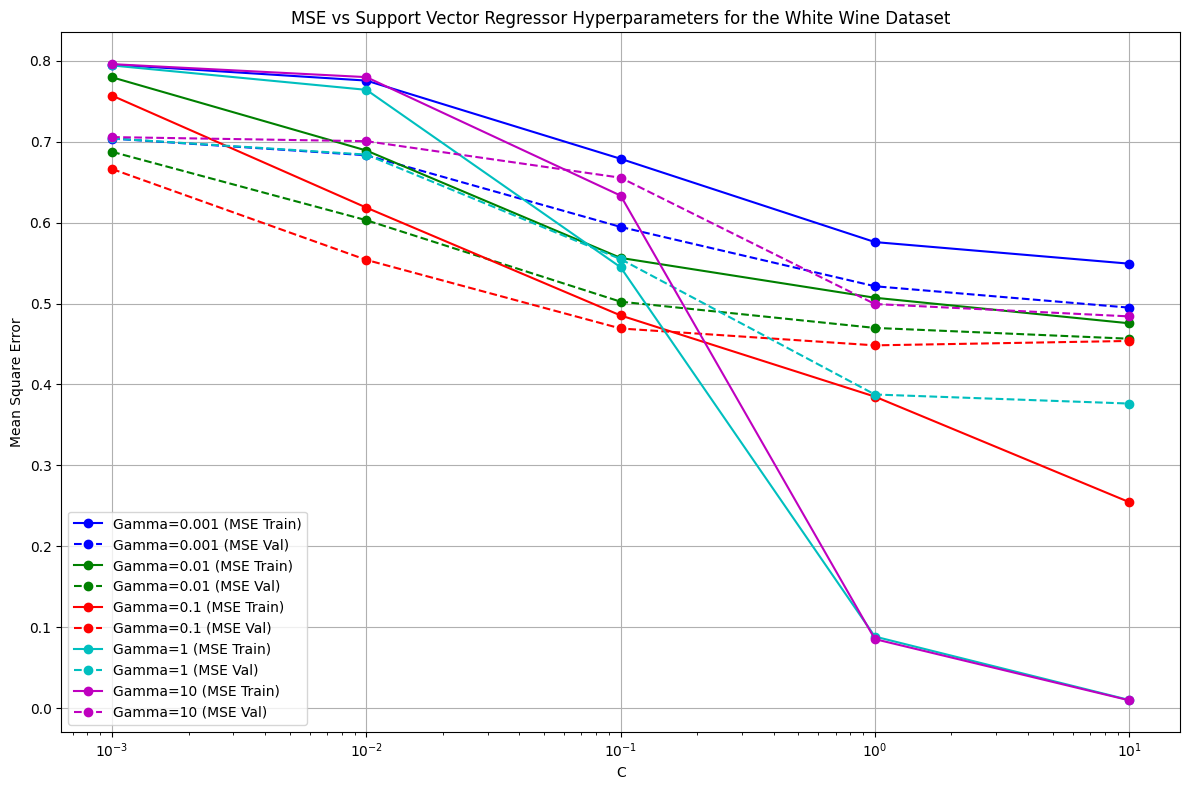

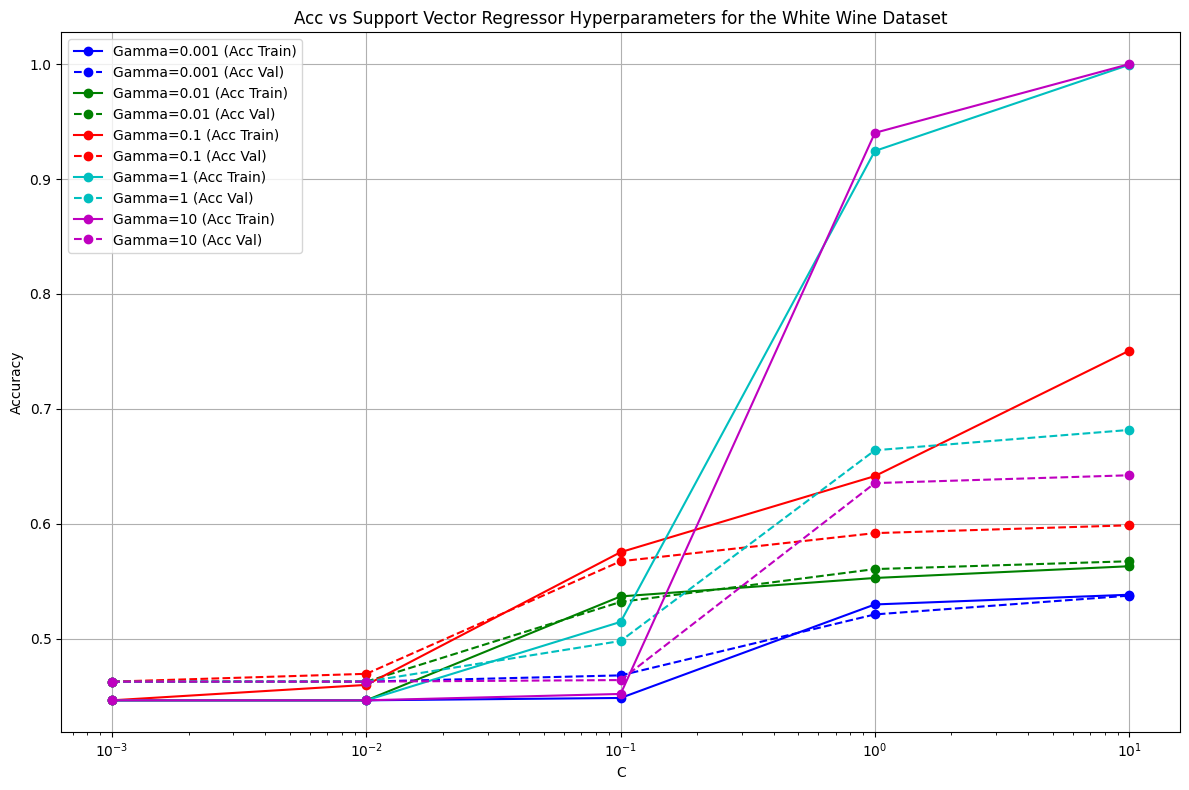

In [24]:
param_grid = {'C': [0.001,0.01,0.1, 1, 10], #Dictionary with the values of C to validate
              'gamma': [0.001,0.01, 0.1, 1, 10]}  #Values of gamma to validate

mse_values_val = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Val MSE for different params
mse_values_t = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Train MSE for different params
acc_values_val = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Val accuracies for different params
acc_values_t = {gamma: [] for gamma in param_grid['gamma']}  #Dictionary for storing Train accuracies for different params

for C in param_grid['C']: #Iterate over different values of C
    for gamma in param_grid['gamma']: #Iterate over different values of gamma
        svr = SVR(kernel='rbf', C=C, gamma=gamma)  #Define SVR with those hyper-params
        svr.fit(X_train_white, y_train_white)  #Train the SVR on training data
        y_pred_train = svr.predict(X_train_white)  #Make predictions on training data
        y_pred_val = svr.predict(X_val_white) #Make predictions on validation data
        mse_values_val[gamma].append(mean_squared_error(y_val_white, y_pred_val))  #Store the val MSE
        mse_values_t[gamma].append(mean_squared_error(y_train_white, y_pred_train))  #Store the train MSE
        y_pred_train = np.clip(np.round(y_pred_train), 3, 9) #Limit the prediction in 3-9 as input data only has those values
        y_pred_val = np.clip(np.round(y_pred_val), 3, 9)  #Limit the prediction in 3-9 as input data only has those values
        acc_values_val[gamma].append(accuracy_score(y_val_white, y_pred_val)) #Store the val accuracies
        acc_values_t[gamma].append(accuracy_score(y_train_white, y_pred_train))  #Store the train accuracies

#Plot for MSE
colors = ['b', 'g', 'r', 'c', 'm', 'y'] #Define colors for lines of different max depth
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(param_grid['gamma']):
    plt.plot(param_grid['C'], mse_values_t[gamma], marker='o', color=colors[i], label=f'Gamma={gamma} (MSE Train)')
    plt.plot(param_grid['C'], mse_values_val[gamma], marker='o', linestyle='dashed', color=colors[i], label=f'Gamma={gamma} (MSE Val)')

plt.xlabel('C')
plt.ylabel('Mean Square Error')
plt.title('MSE vs Support Vector Regressor Hyperparameters for the White Wine Dataset')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

#Plot for Accuracies
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(param_grid['gamma']):
    plt.plot(param_grid['C'], acc_values_t[gamma], marker='o', color=colors[i], label=f'Gamma={gamma} (Acc Train)')
    plt.plot(param_grid['C'], acc_values_val[gamma], marker='o', linestyle='dashed', color=colors[i], label=f'Gamma={gamma} (Acc Val)')

plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Acc vs Support Vector Regressor Hyperparameters for the White Wine Dataset')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot we can see that :

(i) Low values of gamma lead to lower train and val accuracy and higher MSE as compared to others(underfitting)

(ii) High values of gamma lead to higher train accuracy, lower train MSE but may give lower val accuracy and higher val MSE due to overfitting.

So we will be using that set of hyper-param which gives the lowest val MSE

In [25]:
min_mse=99999999  #Initialising mse with a large value and change it every time the mse<current mse
c=100  #Initialising C with max value in param grid and change it every time the mse<current mse
gamma = 100  #Initialising gamma with max value in param grid and change it every time the mse<current mse

for g in param_grid['gamma']:  #Iterate over all values of gamma then update
    for i, mse_val in enumerate(mse_values_val[g]):  #Iterate over the dictionary storing the val MSE
        if mse_val < min_mse:  #If new val MSE>previous lowest val MSE
            min_mse=mse_val  #Update MSE
            c=param_grid['C'][i]  #Update C
            gamma=g  #Update gamma

print("Minimum MSE value:", min_mse)
print("Corresponding C:", c)
print("Corresponding gamma:", gamma)

best_svr_white = SVR(kernel='rbf', C=c, gamma=gamma)  #Define a SVR with the hyper-params which gave the lowest val MSE on val data
best_svr_white.fit(X_train_white, y_train_white)  #Train that SVR on train data
y_pred_test=best_svr_white.predict(X_test_white)  #Make predictions on test data
print("Test MSE = ",mean_squared_error(y_test_white, y_pred_test))  #Print the MSE on test data
y_pred_test = np.clip(np.round(y_pred_test), 3, 9)#Limit the prediction in 3-9 as input data only has those values
print("Test Accuracy = ",accuracy_score(y_test_white, y_pred_test))  #Print the accuracy on test data

Minimum MSE value: 0.37646208321564634
Corresponding C: 10
Corresponding gamma: 1
Test MSE =  0.4854159306307297
Test Accuracy =  0.636734693877551


Here we can see that moderate values of gamma(1) gives the lowest val MSE 

Also I had clipped the output to 3-9 as the input target values only had those values

1(d)

Now we will try to find the importance of each feature and see if they are different or same in different models

For Random Forest I will be using the feature_importances_ attribute which calculates it based on how much each feature decreases impurity across all decision trees in the forest.

For Support Vector I will be using permutation importance which works by measuring the change in loss when the values of a particular feature are randomly permuted while keeping other features constant

In [26]:
features=red.drop(columns=['quality']).columns #Array having name of features, so removed target from it
print("Features:",features)
imp_rf_red = best_rf_red.feature_importances_ # Importances of features in Red Wine dataset when trained using Random Forest 
print("Random Forest Feature Importance(Red Wine):", imp_rf_red)
imp_rf_white = best_rf_white.feature_importances_  # Importances of features in White Wine dataset when trained using Random Forest 
print("Random Forest Feature Importance(White Wine):", imp_rf_white)

imp_sv_red = permutation_importance(best_svr_red, x_red, y_red).importances_mean  # Importances of features in Red Wine dataset when trained using Support Vector
imp_sv_red=imp_sv_red/imp_sv_red.sum() #Scaling to make sum 1
imp_sv_white = permutation_importance(best_svr_white, x_white, y_white).importances_mean  # Importances of features in White Wine dataset when trained using Support Vector 
imp_sv_white=imp_sv_white/imp_sv_white.sum() #Scaling to make sum 1
print("Support Vector Feature Importance(Red Wine):", imp_sv_red)
print("Support Vector Feature Importance(White Wine):", imp_sv_white)



Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
Random Forest Feature Importance(Red Wine): [0.04087913 0.12241901 0.05405815 0.05893326 0.07647227 0.03846691
 0.07200705 0.04244039 0.05938841 0.15368595 0.28124947]
Random Forest Feature Importance(White Wine): [0.06391695 0.12638334 0.06065602 0.06445166 0.06494048 0.11329254
 0.06884166 0.06252602 0.06989277 0.0644578  0.24064075]


Support Vector Feature Importance(Red Wine): [0.07419539 0.14731689 0.07743919 0.04005015 0.0349814  0.05309075
 0.07700653 0.04628396 0.06182191 0.15663402 0.23117981]
Support Vector Feature Importance(White Wine): [0.09207846 0.08876591 0.07808834 0.0988176  0.05063674 0.09250771
 0.09820426 0.10435535 0.09481304 0.08766654 0.11406605]


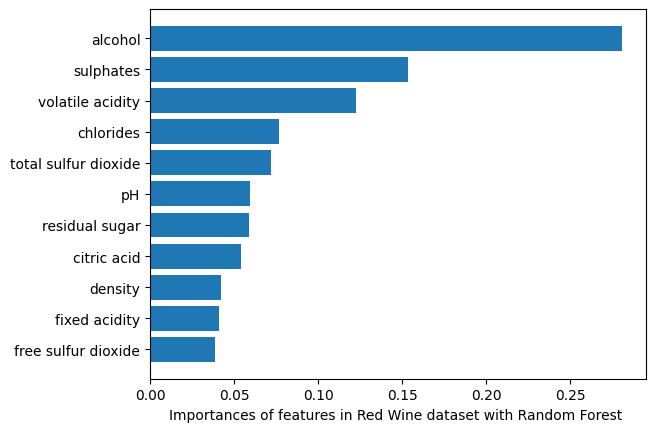

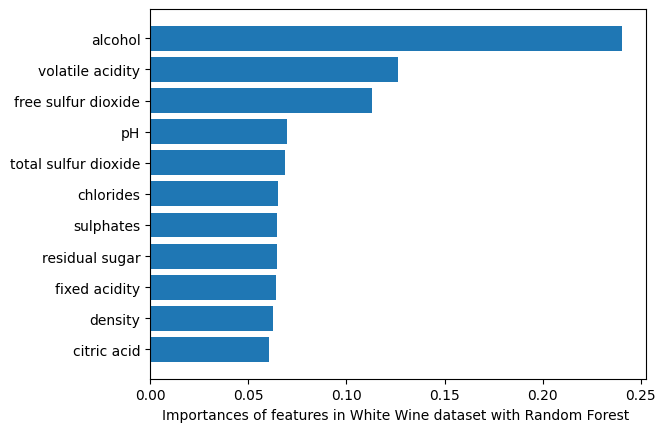

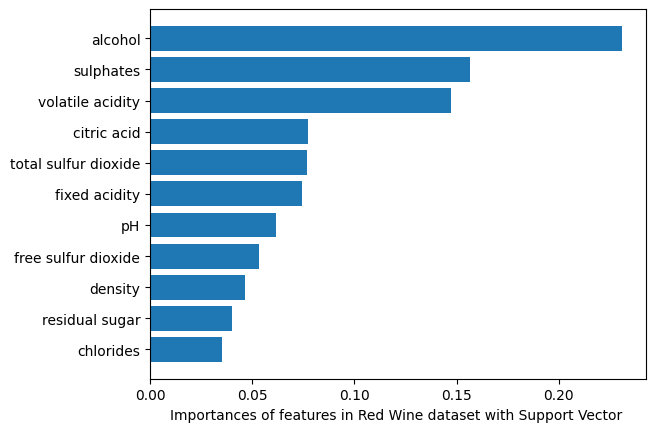

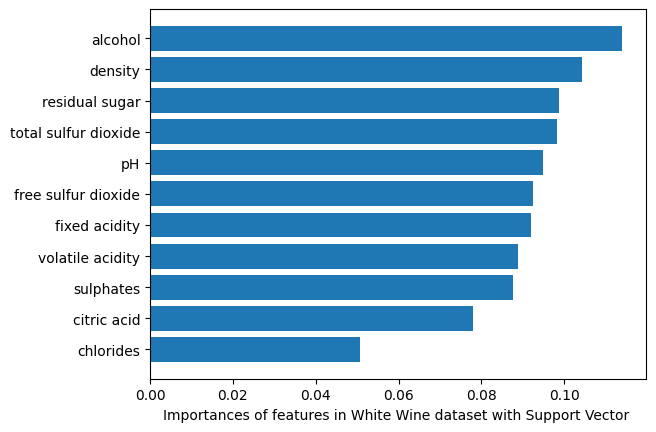

In [27]:
#Plot of feature importances for Random Forest and Support Vector on Red and White Wine Dataset
i =imp_rf_red.argsort() #Sorting and getting their indices
plt.barh(features[i], imp_rf_red[i])
plt.xlabel("Importances of features in Red Wine dataset with Random Forest ")
plt.show()
i =imp_rf_white.argsort() #Sorting and getting their indices
plt.barh(features[i], imp_rf_white[i])
plt.xlabel("Importances of features in White Wine dataset with Random Forest ")
plt.show()
i =imp_sv_red.argsort() #Sorting and getting their indices
plt.barh(features[i], imp_sv_red[i])
plt.xlabel("Importances of features in Red Wine dataset with Support Vector ")
plt.show()
i =imp_sv_white.argsort() #Sorting and getting their indices
plt.barh(features[i], imp_sv_white[i])
plt.xlabel("Importances of features in White Wine dataset with Support Vector ")
plt.show()


Alcohol is an important feature for both the datasets irrespective of the model.This is obvious as I had earlier shown that alcohol is the most correlated feature with Quality

Apart from that, Sulphates and Volatile Acidity is important in the Red Wine Dataset and Total Sulphur Dioxide is important for the White Wine Dataset

We also see that some features that are important for one model may not be important in another model (Eg Volatile Acidity in White Wine)

1(e)

Next I will be using the trained RFR and SVR to test on the other dataset which it isn't trained on(Train on red - Test on white, vice versa)


In [28]:
y1=best_rf_red.predict(X_test_white) #Using RFR trained on Red to test White
y2=best_rf_white.predict(X_test_red) #Using RFR trained on White to test Red
y3=best_svr_red.predict(X_test_white) #Using SVR trained on Red to test White
y4=best_svr_white.predict(X_test_red) #Using SVR trained on White to test Red

print("MSE when used RFR trained on Red to test White",mean_squared_error(y1,y_test_white))
print("MSE when used RFR trained on White to test Red",mean_squared_error(y2,y_test_red))
print("MSE when used SVR trained on Red to test White",mean_squared_error(y3,y_test_white))
print("MSE when used SVR trained on White to test Red",mean_squared_error(y4,y_test_red))

print("Accuracy when used RFR trained on Red to test White",accuracy_score(np.clip(np.round(y1), 3, 9),y_test_white))
print("Accuracy when used RFR trained on White to test Red",accuracy_score(np.clip(np.round(y2), 3, 8),y_test_red))
print("Accuracy when used SVR trained on Red to test White",accuracy_score(np.clip(np.round(y3), 3, 9),y_test_white))
print("Accuracy when used SVR trained on White to test Red",accuracy_score(np.clip(np.round(y4), 3, 8),y_test_red))

MSE when used RFR trained on Red to test White 0.8028094055163225
MSE when used RFR trained on White to test Red 0.5452119808601705
MSE when used SVR trained on Red to test White 0.8462145158602729
MSE when used SVR trained on White to test Red 0.5751344251552628
Accuracy when used RFR trained on Red to test White 0.45170068027210886
Accuracy when used RFR trained on White to test Red 0.49583333333333335
Accuracy when used SVR trained on Red to test White 0.4340136054421769
Accuracy when used SVR trained on White to test Red 0.4708333333333333


We can clearly see that the MSE increases and accuracy decreases due to this interchanging of model's target. This is most likely due to the difference in distributions of both the datasets  When we train the model on 1 data,it tries to fits on that distribution and thus may not perform well on the other distribution

Q2(a,b)

In [29]:
mice = pd.read_excel('mice/Data_Cortex_Nuclear.xls') #Reading the excel file
mice

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

Next we will see the stats(mean,min,max,standard dev) of the columns having numerical values

In [30]:
mice.describe() #For viewing the stats of different columns

DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.063236     0.064043     1.343998     0.112812     0.429032  ...   
25%       0.205755     0.164595     2.479834     0.190823     1.203665  ...   
50%       0.231177     0.182302     3.326520     0.210594     1.355846  ...   
75%       0.257261     0.197418     4.481940     0.234595     1.561316  ...   
max       0.539050     0.317066     7.464070     0.306247     6.113347  ...   

             SHH_N       BAD_N      BCL2_N        pS6_N      pCFOS_N  \
count  1080.000000  867.000000  795.000000  1080.000000  1005.000000   
mean      0.226676    0.157914    0.134762     0.121521     0.131053   
std       0.028989    0.029537    0.027417     0.014276     0.023863   
min       0.155869    0.088305    0.080657     0.067254     0.085419   
25%       0.206395    0.136424    0.115554     0.110839     0.113506   
50%       0.224000    0.152313    0.129468     0.121626     0.126523   
75%       0.241655    0.174017    0.148235     0.131955     0.143652   
max       0.358289    0.282016    0.261506     0.158748     0.256529   

             SYP_N   H3AcK18_N      EGR1_N    H3MeK4_N       CaNA_N  
count  1080.000000  900.000000  870.000000  810.000000  1080.000000  
mean      0.446073    0.169609    0.183135    0.205440     1.337784  
std       0.066432    0.059402    0.040406    0.055514     0.317126  
min       0.258626    0.079691    0.105537    0.101787     0.586479  
25%       0.398082    0.125848    0.155121    0.165143     1.081423  
50%       0.448459    0.158240    0.174935    0.193994     1.317441  
75%       0.490773    0.197876    0.204542    0.235215     1.585824  
max       0.759588    0.479763    0.360692    0.413903     2.129791  

[8 rows x 77 columns]

Next we will analyse the different features by looking at the variation in their values (Ref - Code shared by Prof. Amit Sethi)

In [31]:
for col in mice.columns.values: # For each column
  list_vals = pd.unique(mice[col])    # Create a list of unique values
  print(col + ' has ' + str(len(list_vals)) + ' unique values')
  if len(list_vals) < 20: # If the column has less than 10 unique values then print them
    list_str = ''
    for n_value in range(0,len(list_vals)):
      list_str = list_str + str(list_vals[n_value]) + ', '
    print('  These are: '+list_str[0:len(list_str)-2])

MouseID has 1080 unique values
DYRK1A_N has 1078 unique values
ITSN1_N has 1077 unique values
BDNF_N has 1078 unique values
NR1_N has 1078 unique values
NR2A_N has 1078 unique values
pAKT_N has 1077 unique values
pBRAF_N has 1076 unique values
pCAMKII_N has 1078 unique values
pCREB_N has 1078 unique values
pELK_N has 1078 unique values
pERK_N has 1078 unique values
pJNK_N has 1077 unique values
PKCA_N has 1078 unique values
pMEK_N has 1078 unique values
pNR1_N has 1078 unique values
pNR2A_N has 1078 unique values
pNR2B_N has 1078 unique values
pPKCAB_N has 1078 unique values
pRSK_N has 1078 unique values
AKT_N has 1078 unique values
BRAF_N has 1078 unique values
CAMKII_N has 1078 unique values
CREB_N has 1074 unique values
ELK_N has 1063 unique values
ERK_N has 1078 unique values
GSK3B_N has 1078 unique values
JNK_N has 1078 unique values
MEK_N has 1073 unique values
TRKA_N has 1076 unique values
RSK_N has 1075 unique values
APP_N has 1078 unique values
Bcatenin_N has 1063 unique value

According to the question, we will feed the protein values as input to the model and predict the Genotype(which is Binary)
Hence we will apply one-hot encoding on the Genotype Column to replace them as 0 or 1.
Also few columns have some missing values, for which we will use Multivariate Feature Imputation later to fill them


In [32]:
map = {'Control': 0, 'Ts65Dn': 1} #Dictionary to map Genotype names into one-hot form
mice['Genotype'] = mice['Genotype'].map(map) #Replace the values using the mapping 
mice['Genotype'] = mice['Genotype'].astype(int) #Convert the float value to int
mice

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652         0  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610         0  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427         0  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563         0  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730         0  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823         1     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478         1     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825         1     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031         1     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999         1     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

As we won't be dealing with 'Treatment','Behavior' and 'class' in this part and also as MouseID is not a feature, we will drop them from the df

In [33]:
mice=mice.drop(['MouseID','Treatment','Behavior','class'],axis=1) #Dropping these columns as we won't need them
mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1077 non-null   float64
 1   ITSN1_N          1077 non-null   float64
 2   BDNF_N           1077 non-null   float64
 3   NR1_N            1077 non-null   float64
 4   NR2A_N           1077 non-null   float64
 5   pAKT_N           1077 non-null   float64
 6   pBRAF_N          1077 non-null   float64
 7   pCAMKII_N        1077 non-null   float64
 8   pCREB_N          1077 non-null   float64
 9   pELK_N           1077 non-null   float64
 10  pERK_N           1077 non-null   float64
 11  pJNK_N           1077 non-null   float64
 12  PKCA_N           1077 non-null   float64
 13  pMEK_N           1077 non-null   float64
 14  pNR1_N           1077 non-null   float64
 15  pNR2A_N          1077 non-null   float64
 16  pNR2B_N          1077 non-null   float64
 17  pPKCAB_N      

Now we will impute the missing values in the df through Multivariate Feature Imputation as a part of pre-processing the data

In [34]:
columns_to_impute = mice.columns[mice.isnull().any()].tolist() #Finding columns with missing values
print(columns_to_impute) #Printing those columns
imputer = IterativeImputer() #Defining a Multivariate Feature Imputer
imputed_data = imputer.fit_transform(mice[columns_to_impute]) #Fitting the imputer on those columns
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute) #Converting the imputed data as a df
mice[columns_to_impute] = imputed_df #Replacing the imputed columns in the original df
mice.info()

['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'BAD_N', 'BCL2_N', 'pCFOS_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

c:\Users\SHOUNAK DAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Next we will plot the histograms of the different features to get an idea of their distributions

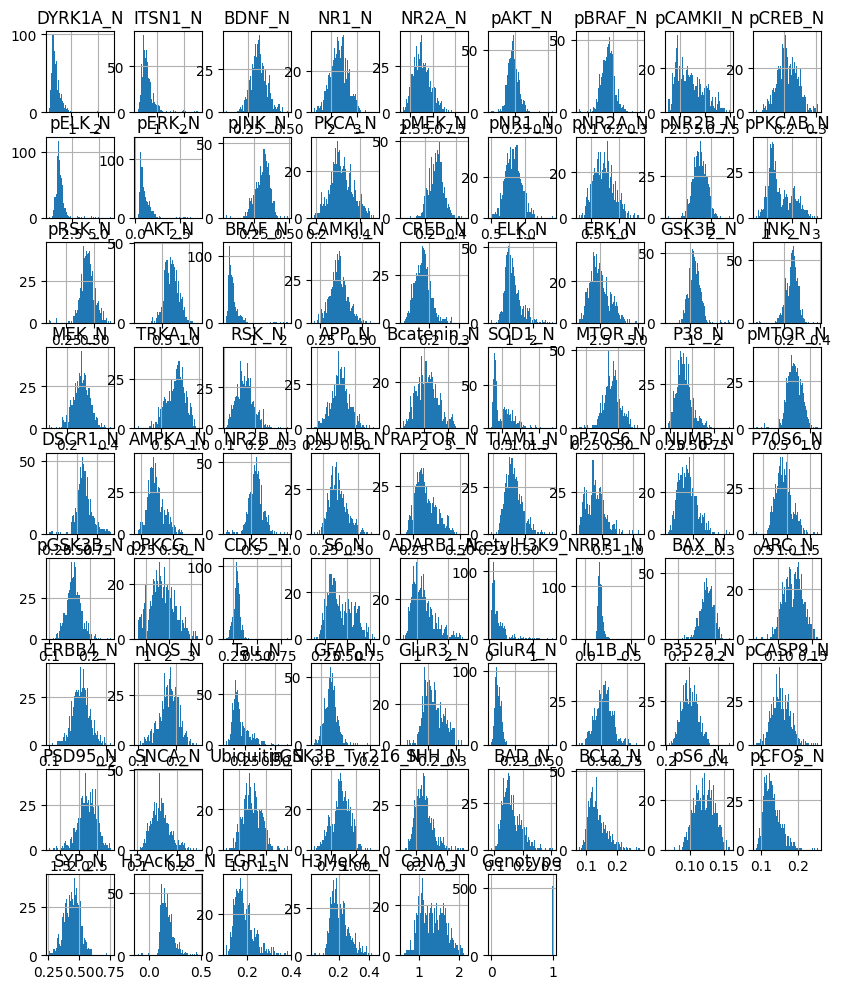

In [35]:
mice.hist(bins=100,figsize=(10,12)) #Histogram
plt.show()

As most of the features are showing a Gaussian Distribution, so I won't be applying any transformation on the other features to maintain the nature of the dataset 

Now we will plot the Box Plots(for distribution and getting an idea of outliers) for each of the features in the Mice dataset

C:\Users\SHOUNAK DAS\AppData\Local\Temp\ipykernel_1880\3273701800.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


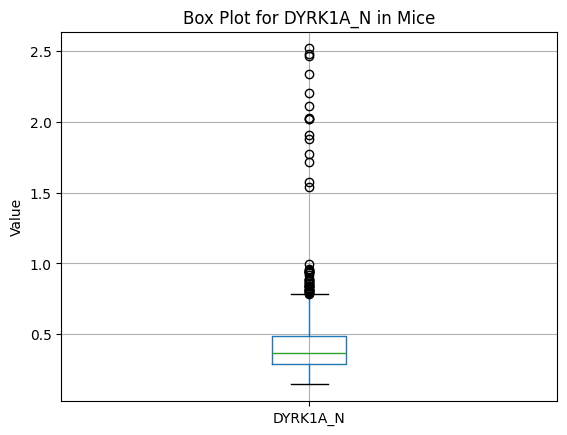

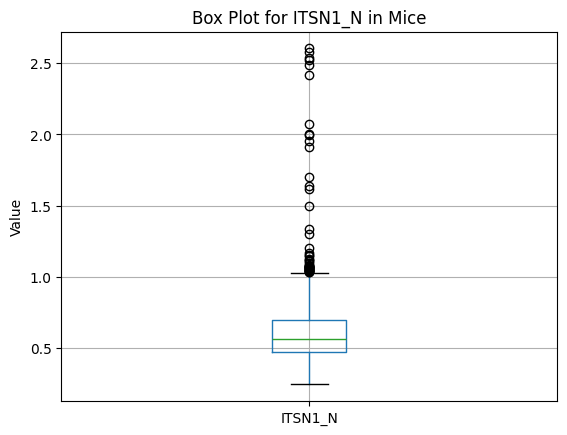

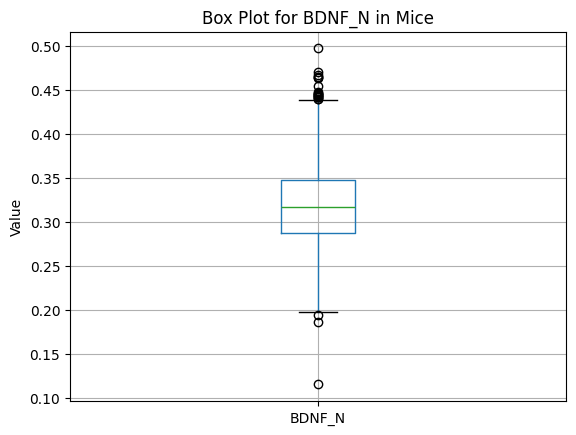

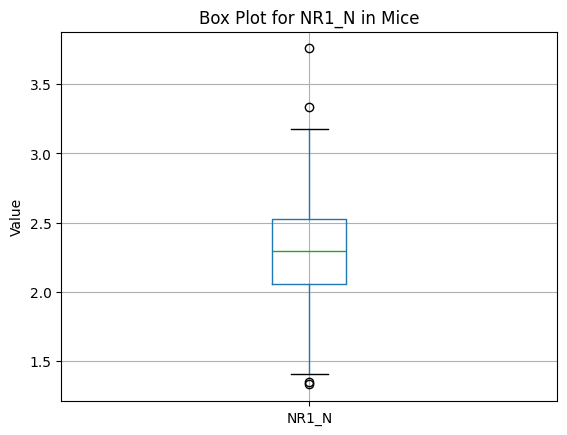

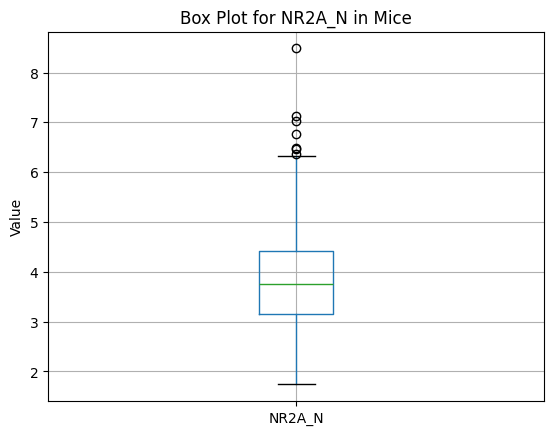

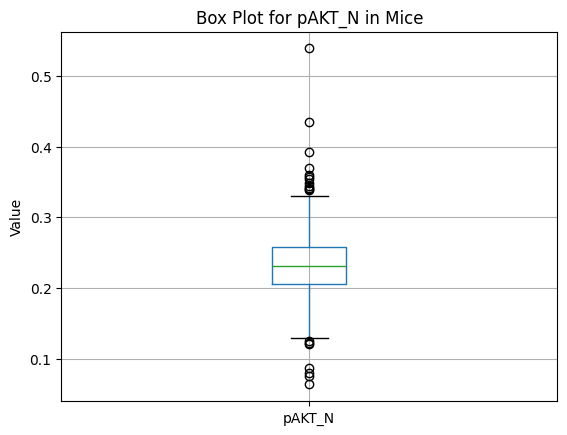

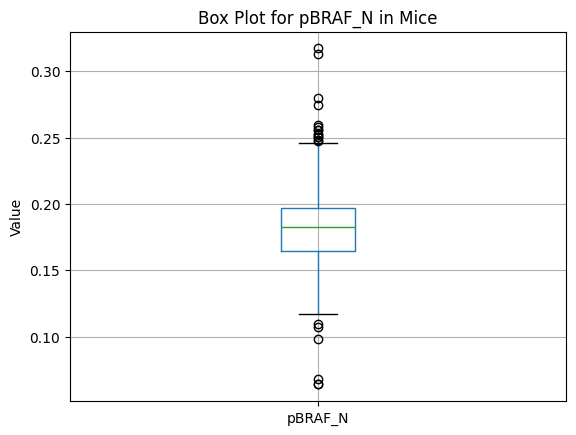

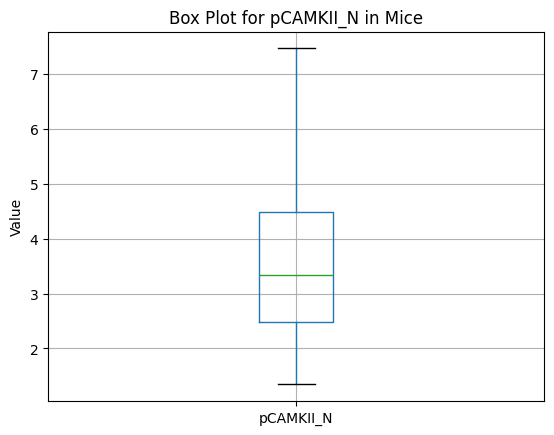

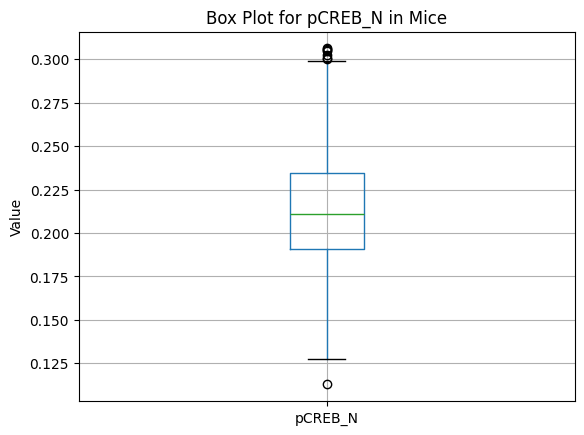

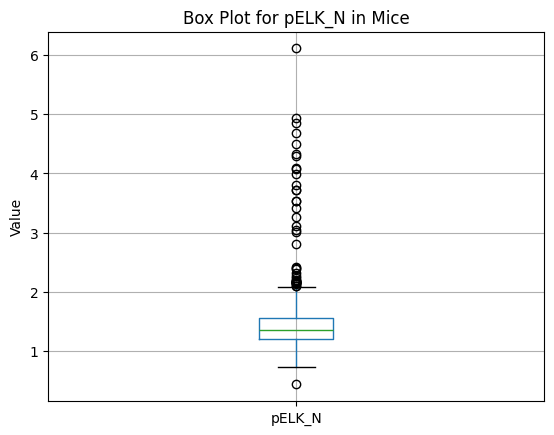

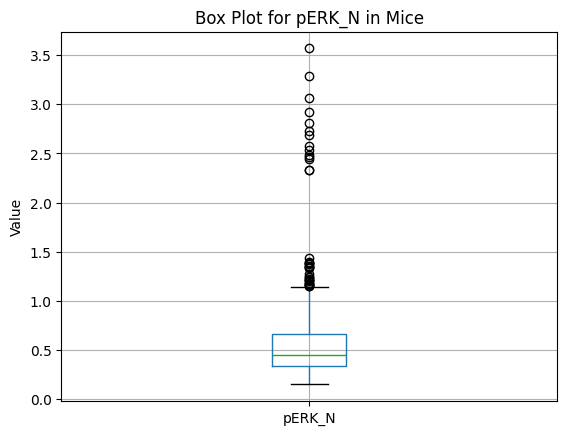

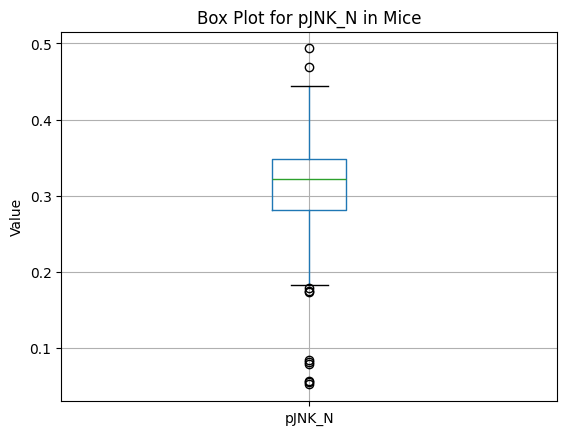

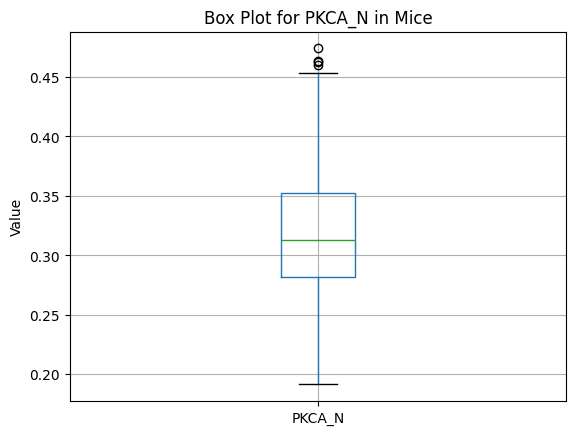

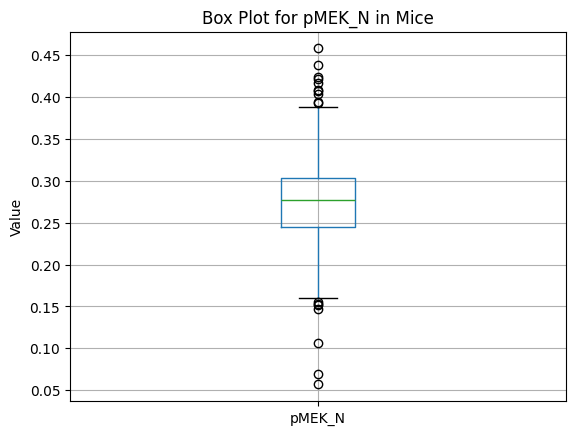

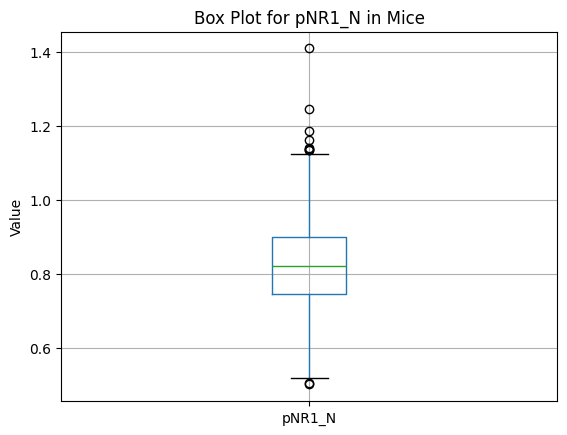

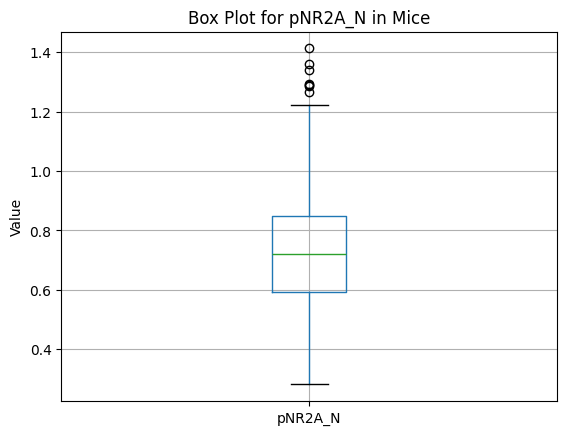

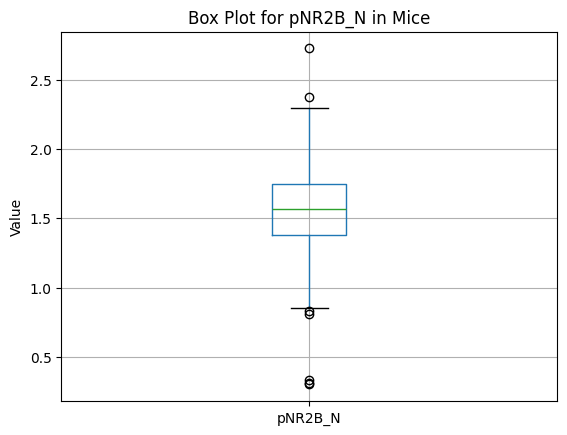

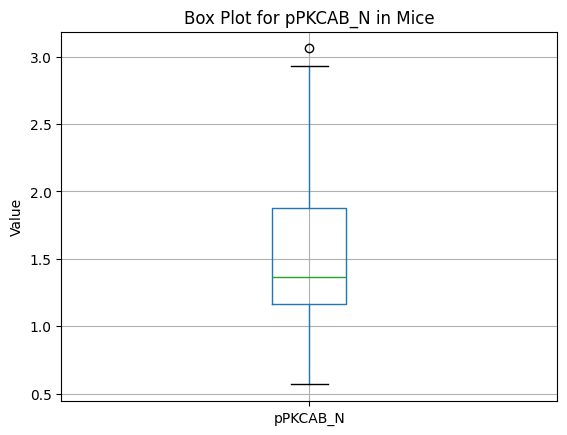

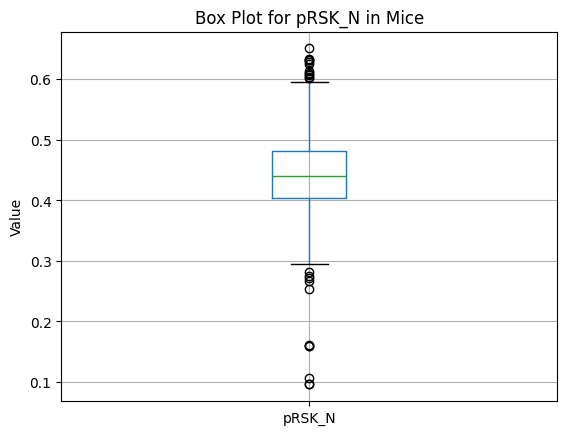

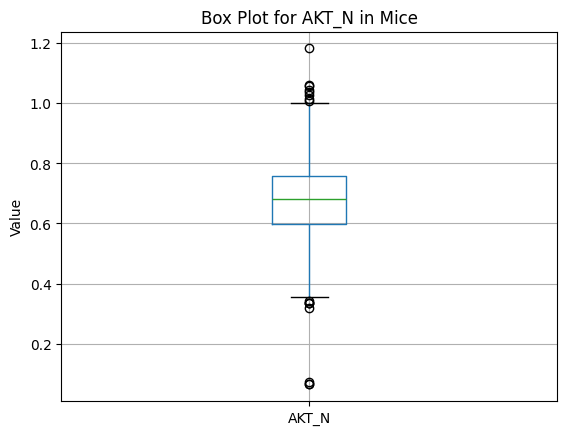

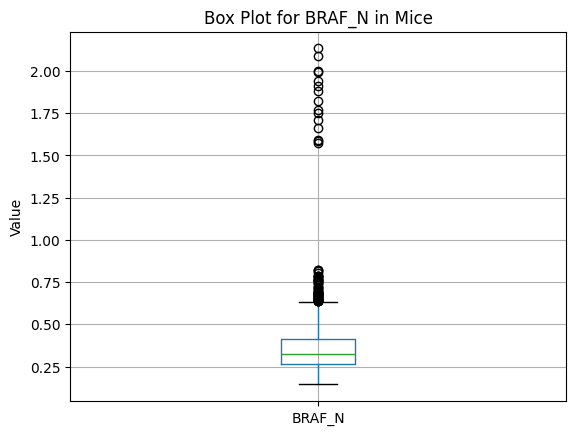

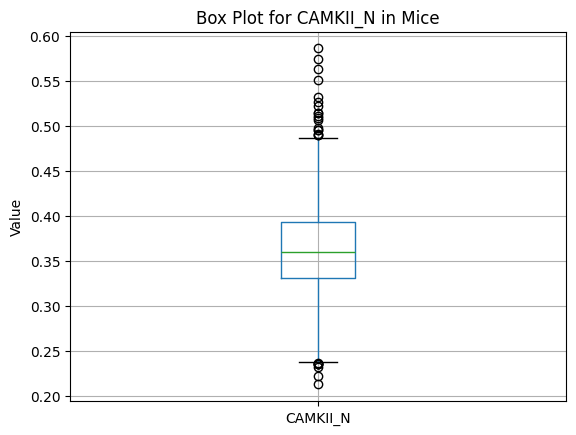

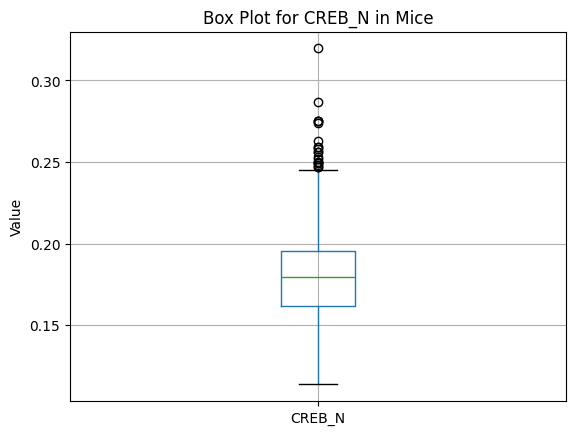

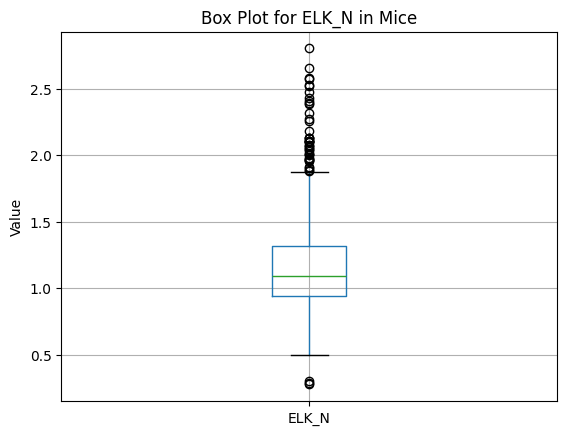

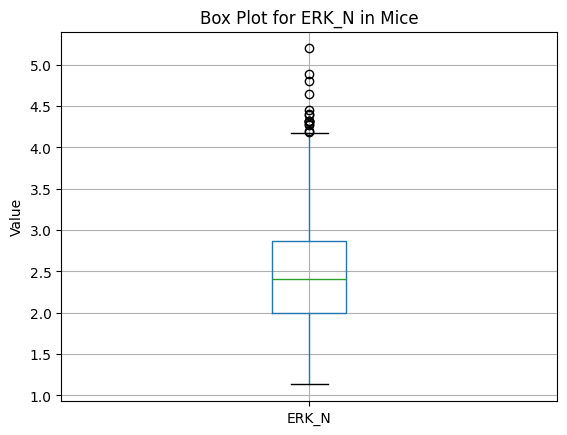

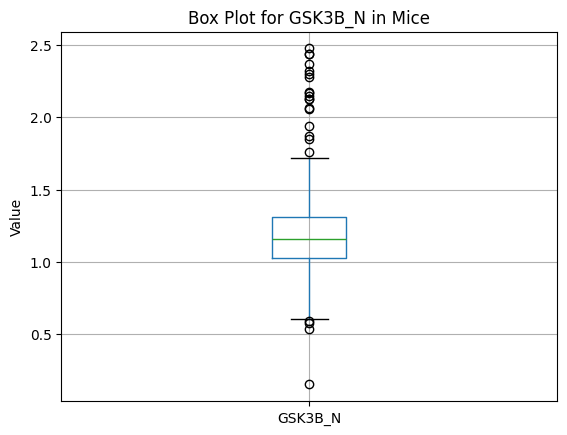

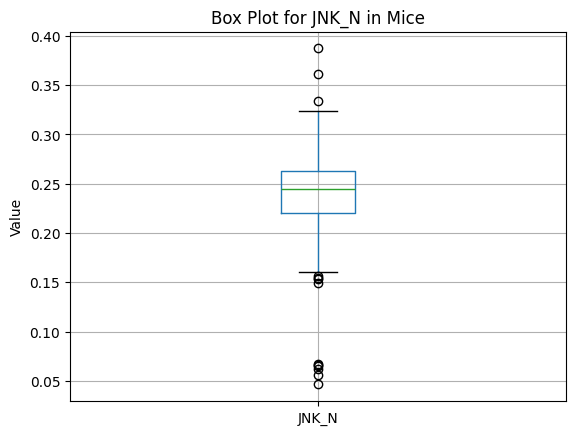

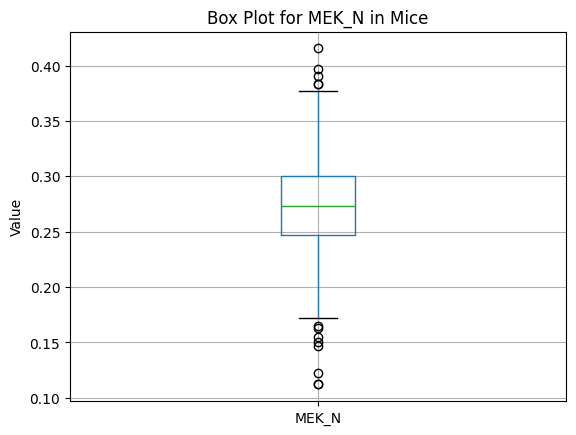

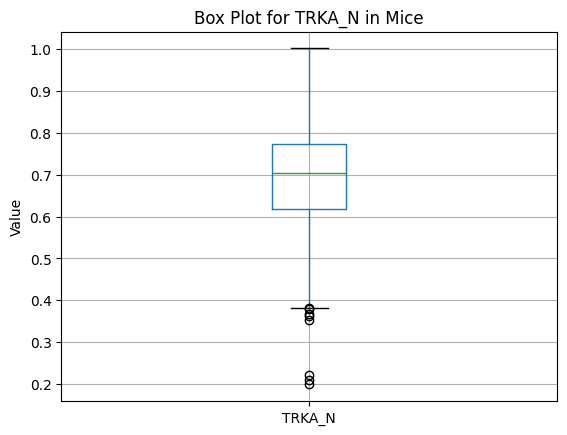

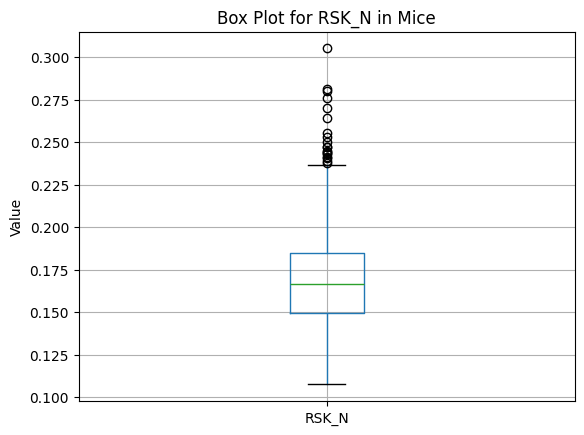

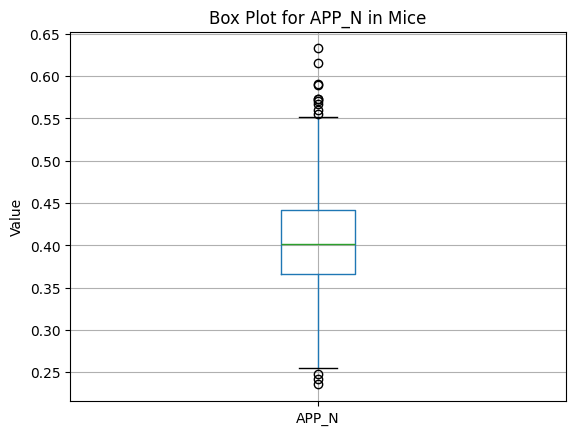

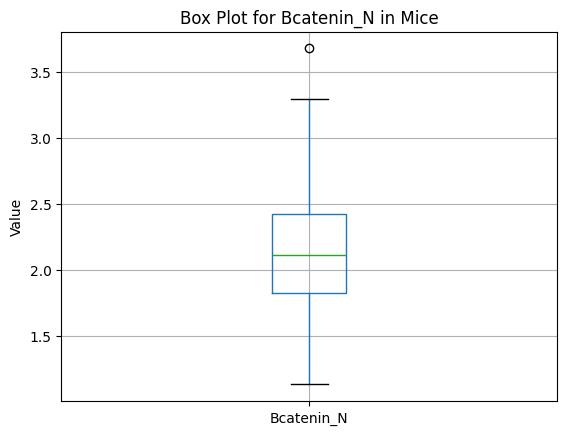

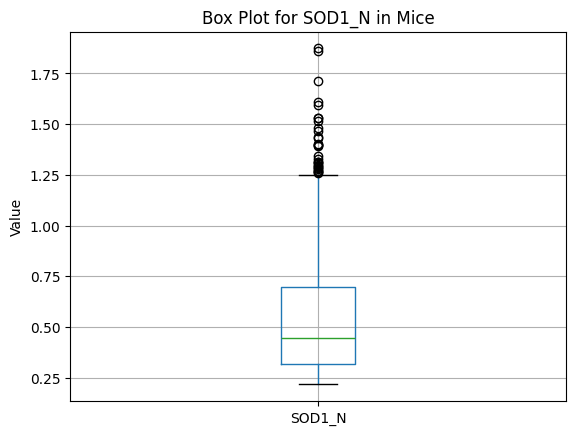

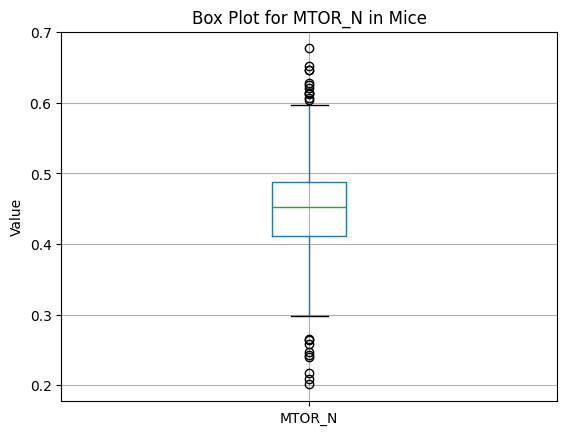

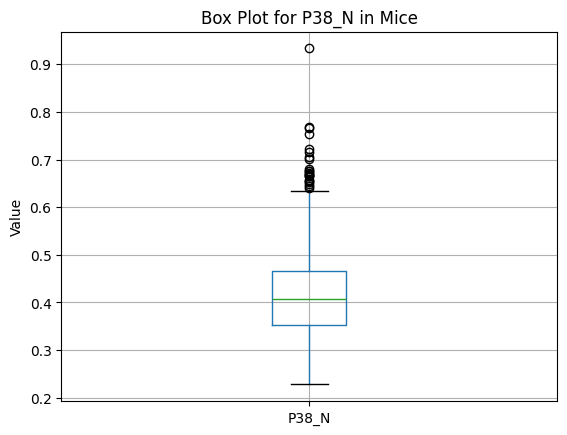

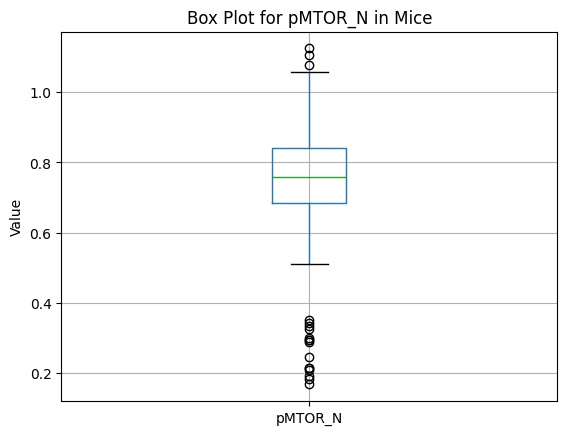

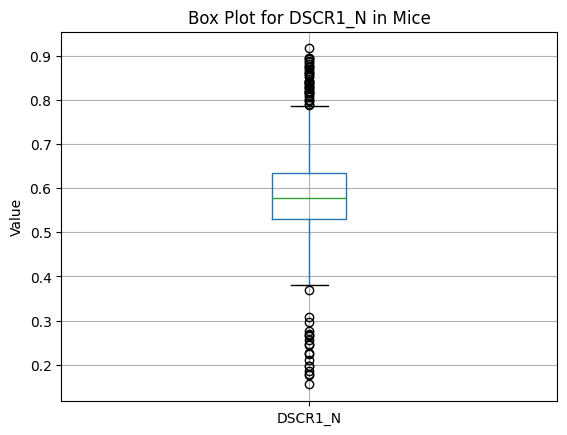

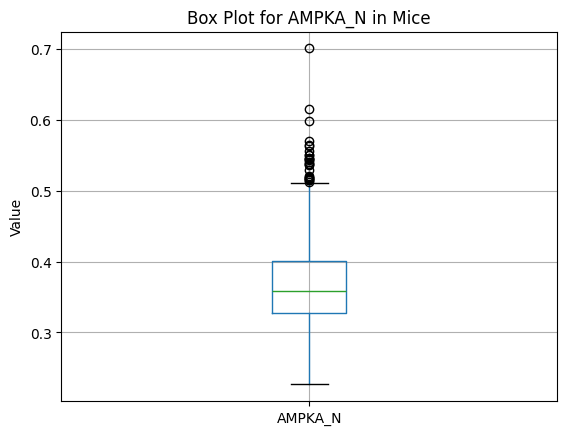

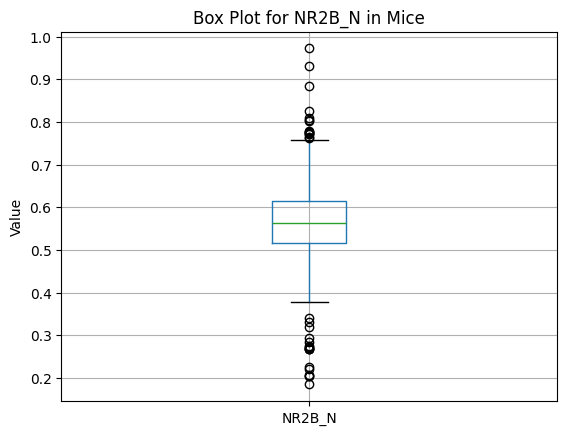

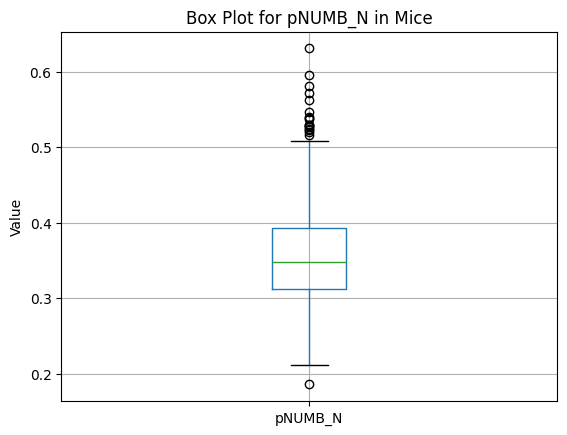

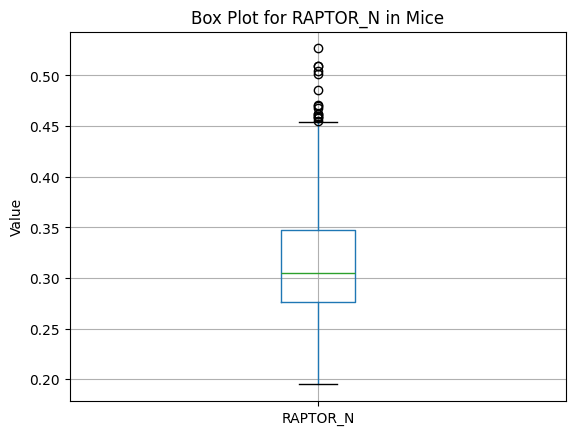

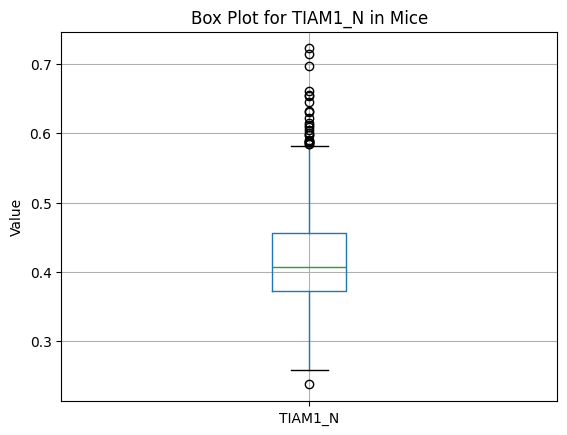

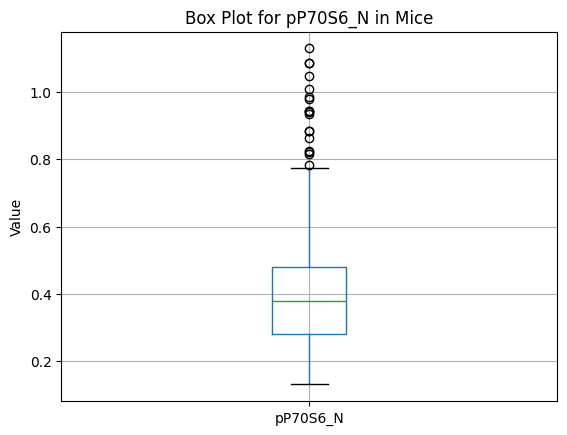

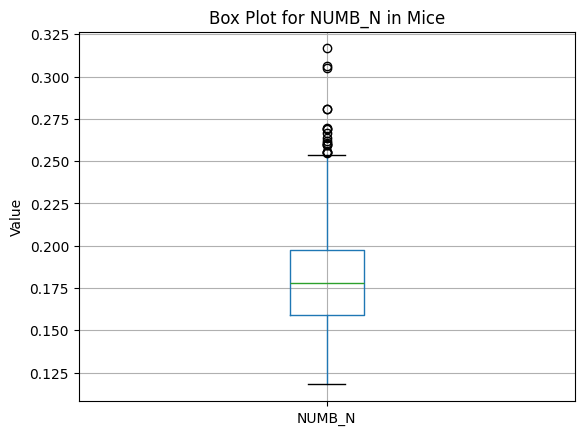

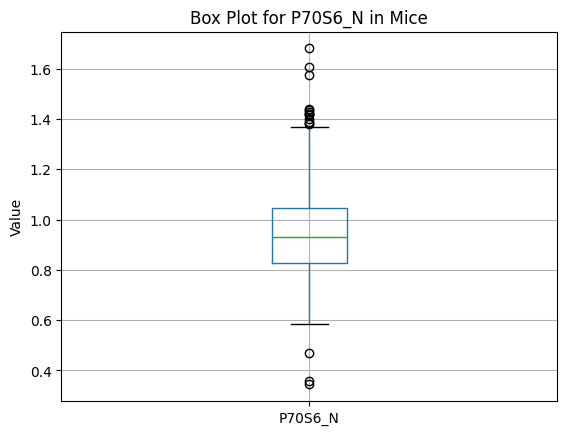

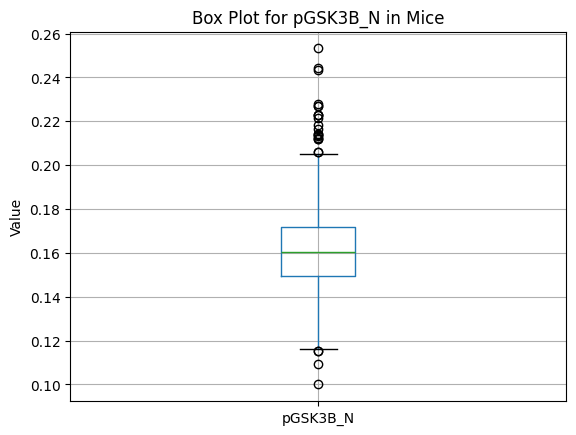

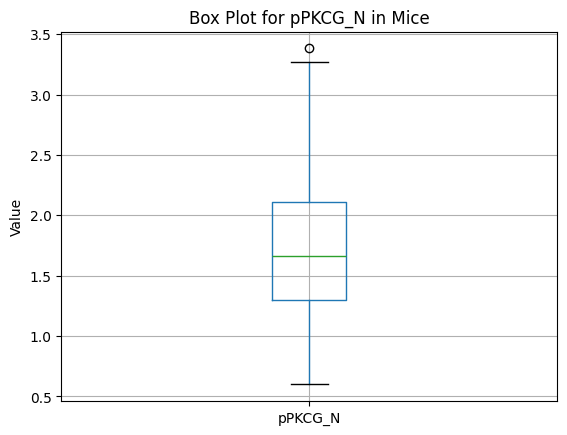

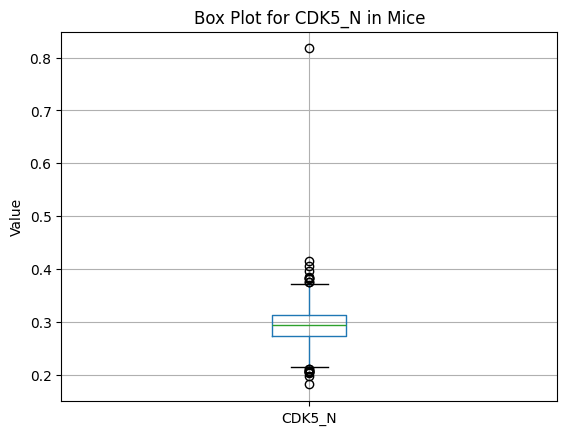

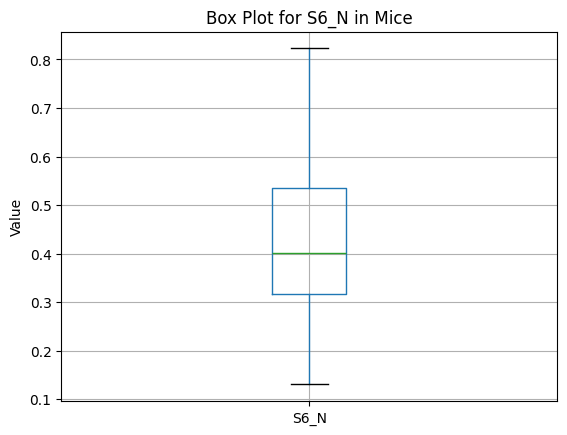

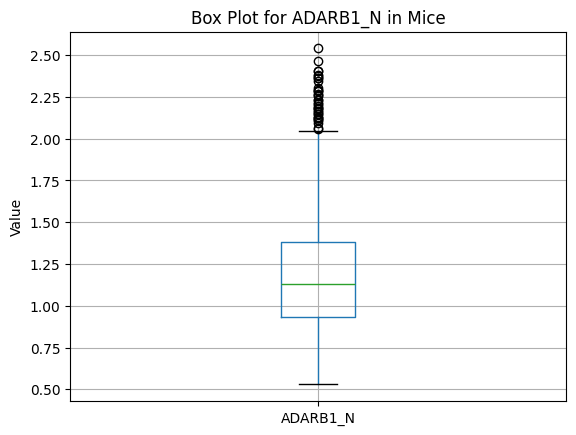

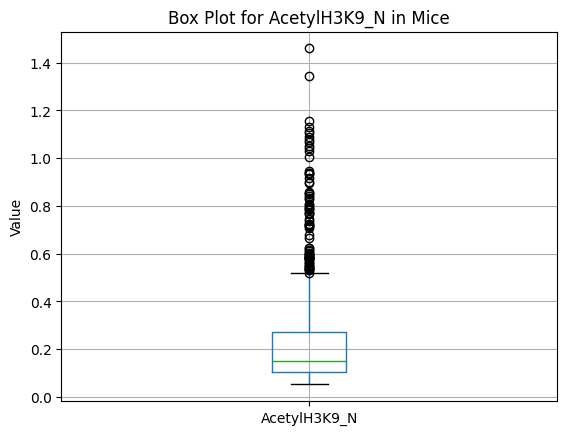

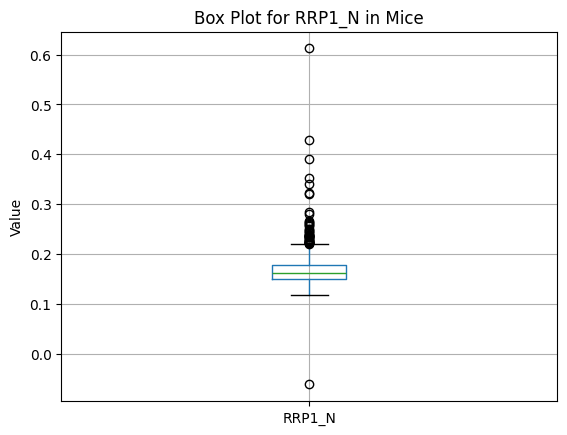

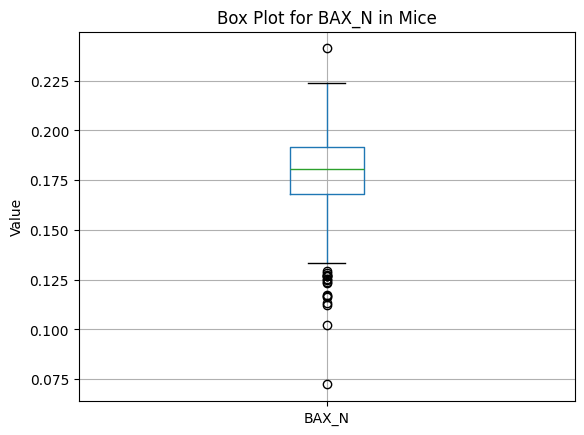

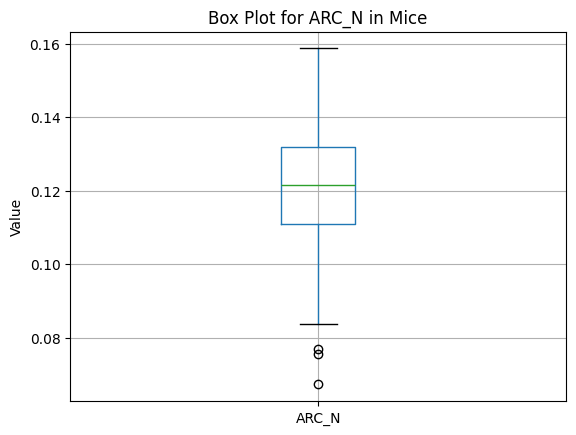

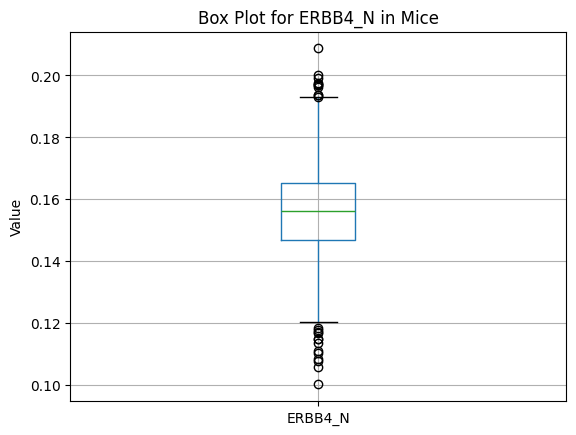

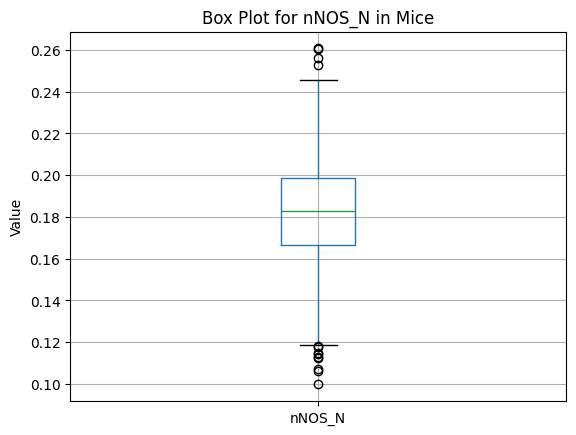

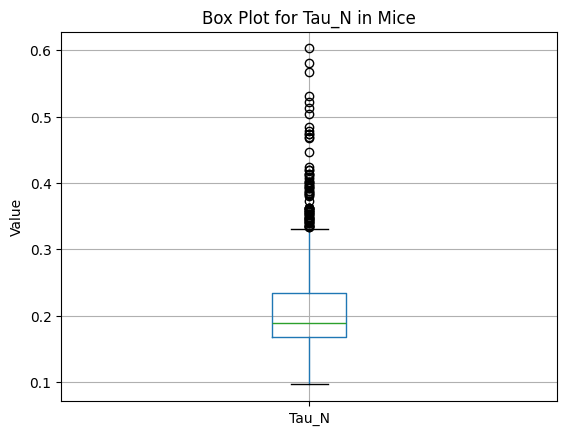

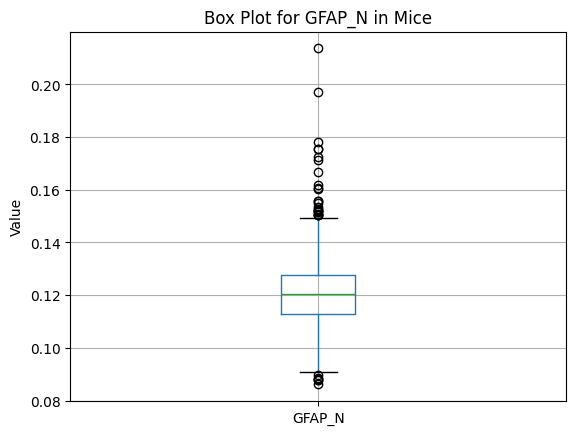

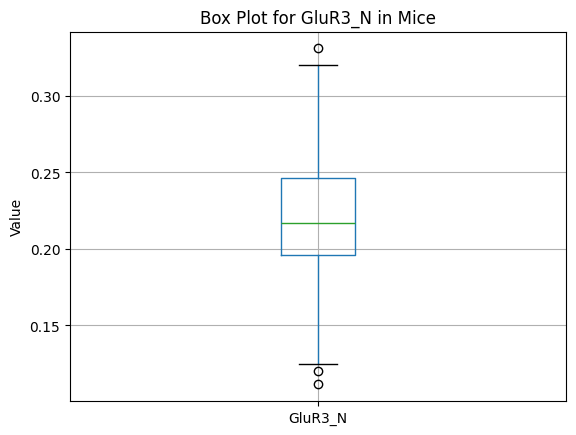

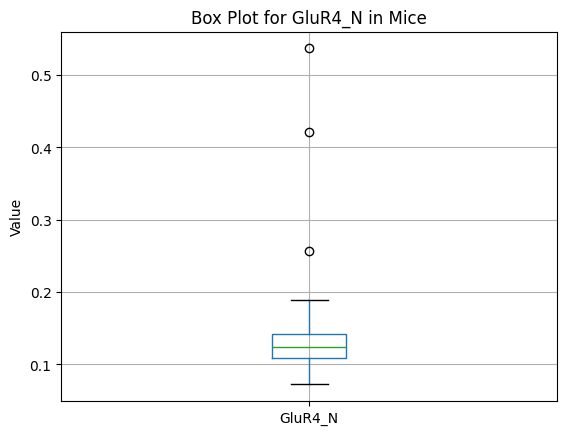

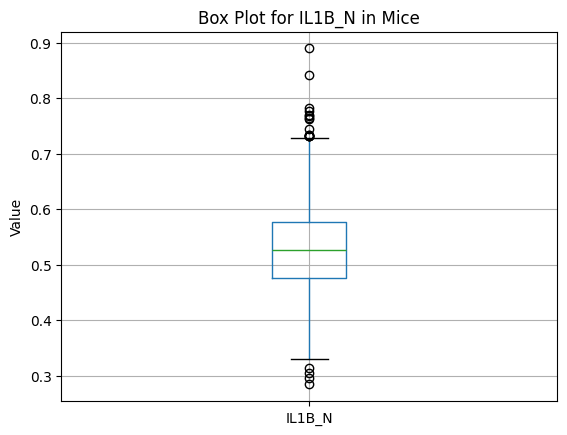

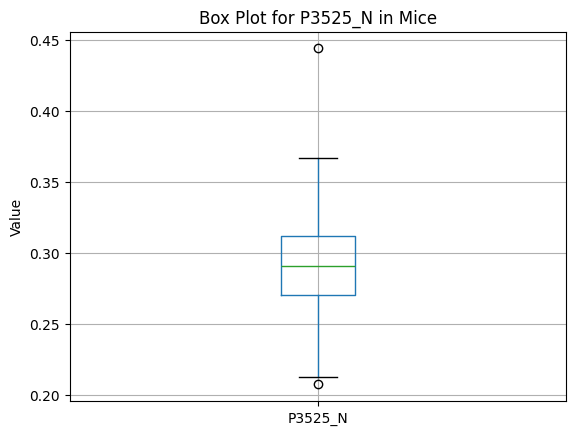

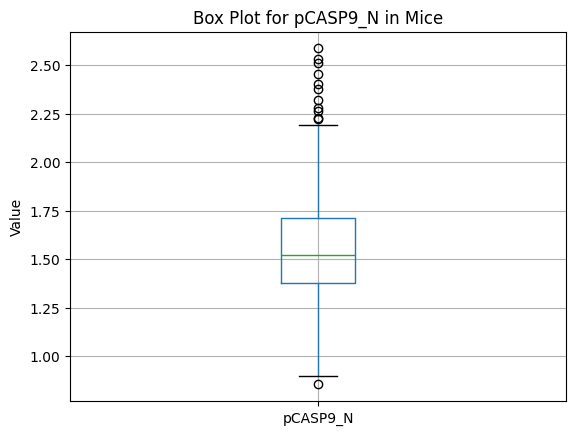

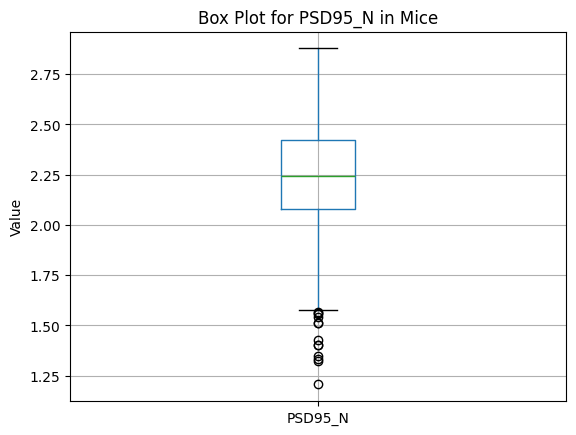

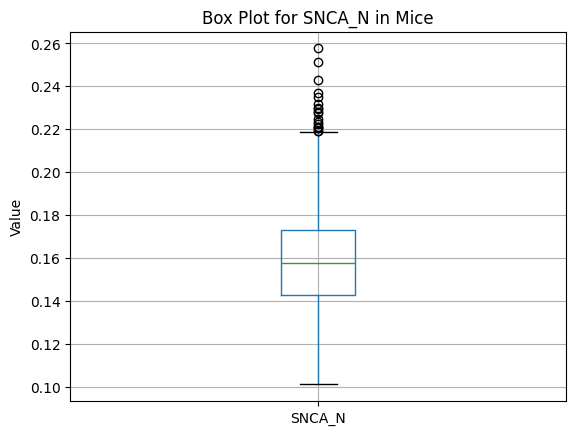

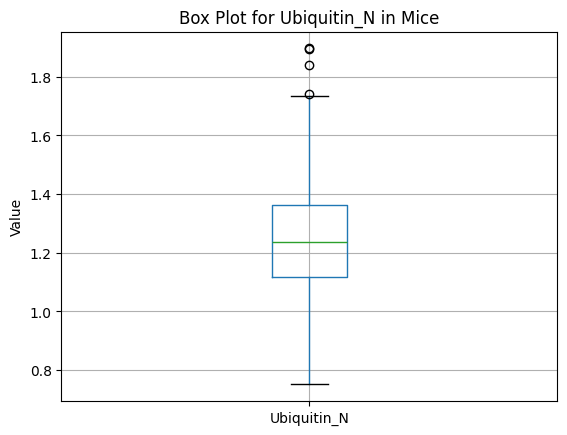

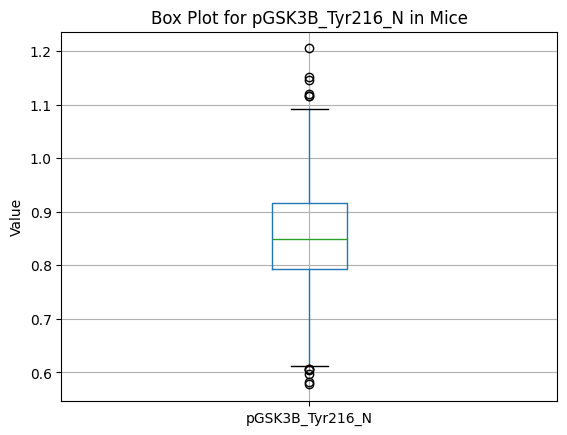

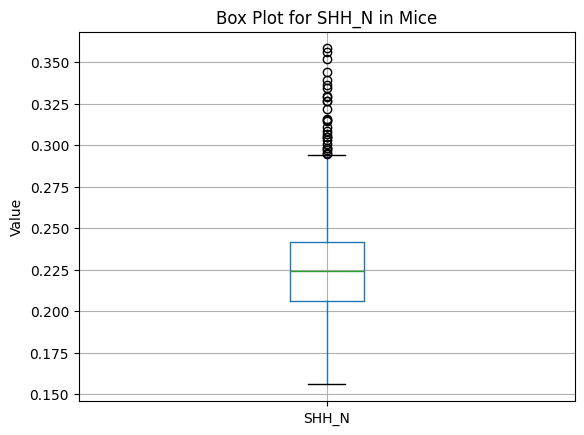

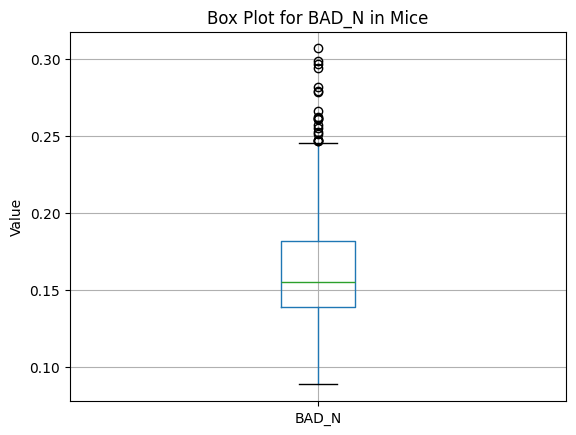

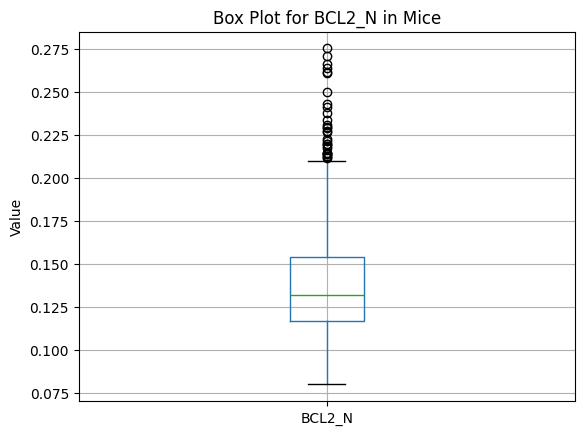

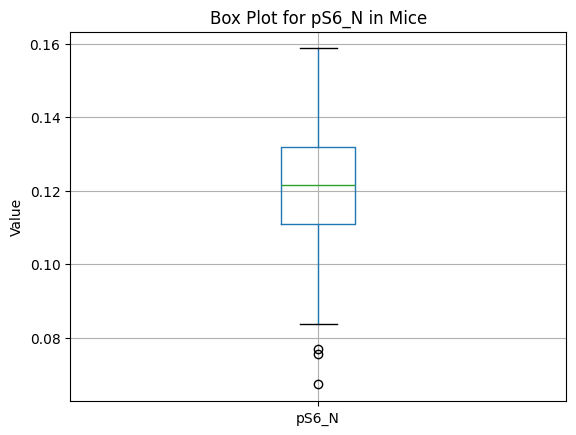

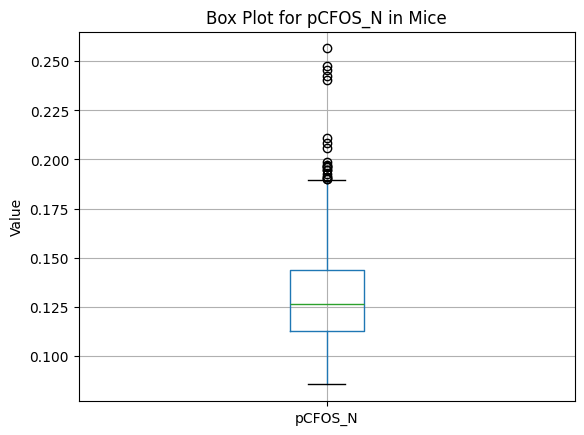

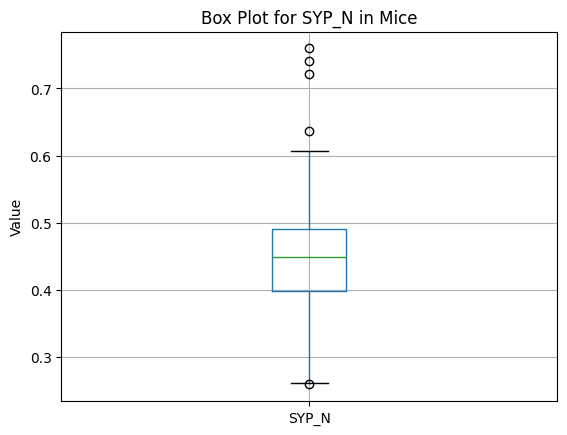

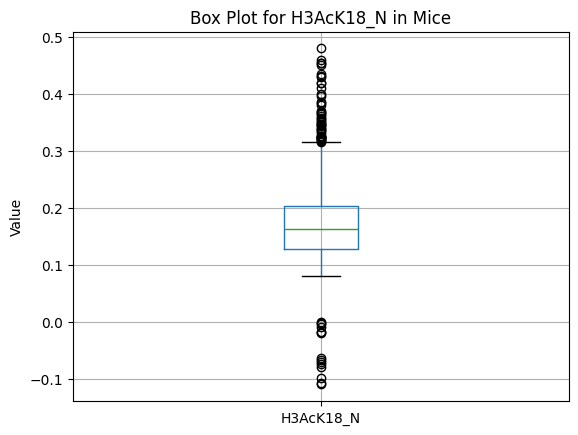

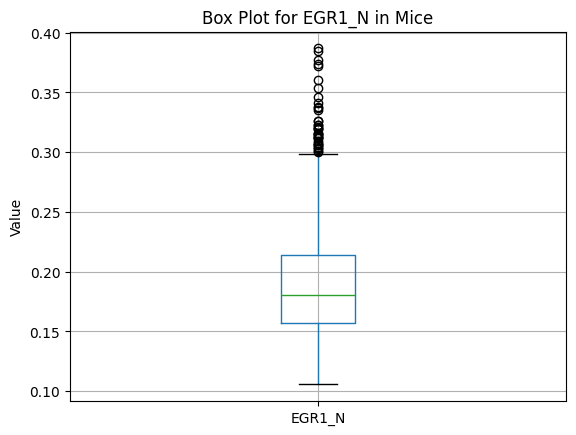

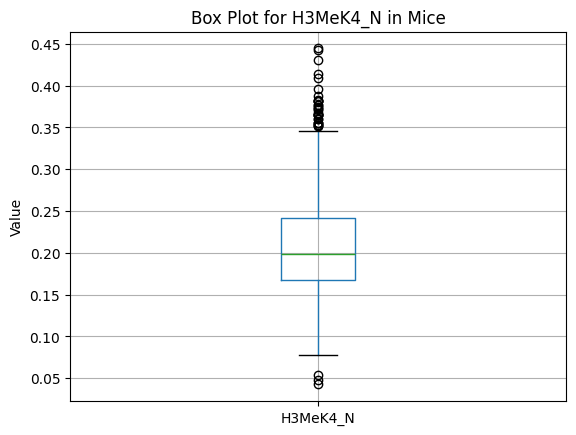

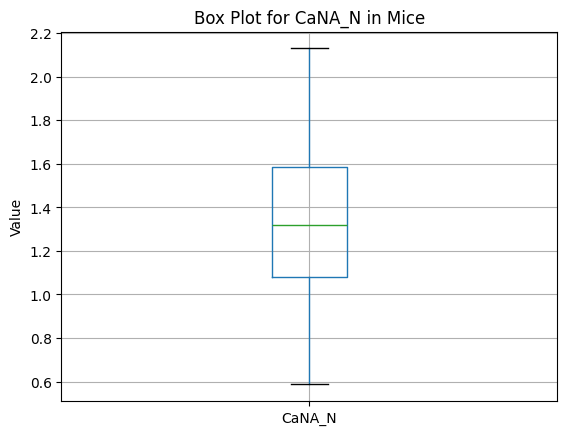

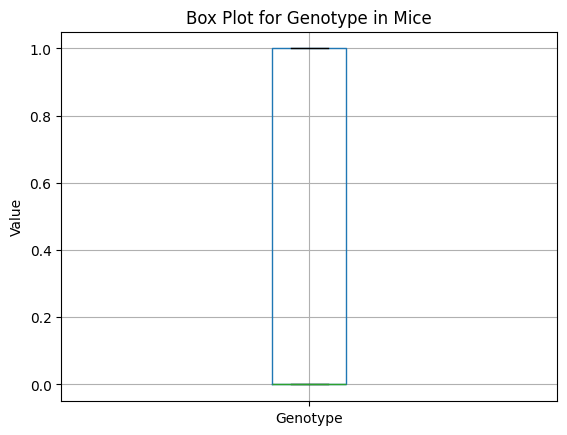

In [36]:
for column in mice.columns: #For each column
    plt.figure()
    mice.boxplot(column=[column]) #BoxPlot
    plt.title(f'Box Plot for {column} in Mice')
    plt.ylabel('Value')
plt.show()

Next I will be normalising the data as a part of the pre-processing process

0         1         2         3         4         5         6   \
0     0.312748  0.517991  2.253329  1.497436  2.304545 -0.345848 -0.159246   
1     0.356835  0.286560  1.879946  1.420082  1.976951 -0.518923 -0.335148   
2     0.335003  0.450522  2.012592  1.124934  1.909332 -0.582083 -0.227528   
3     0.065511 -0.000043  0.801809  0.489556  1.219435 -0.248270 -0.200102   
4     0.036719  0.001365  0.805378  0.197727  0.939393 -0.483562 -0.305144   
...        ...       ...       ...       ...       ...       ...       ...   
1075 -0.686783 -0.611109 -1.303297 -0.591839 -1.335346 -0.516531 -0.392754   
1076 -0.617127 -0.569021 -1.368679 -0.391902 -1.119046  0.434703  0.023411   
1077 -0.791889 -0.883477 -1.724098 -1.627172 -1.742466 -0.301697 -0.756781   
1078 -0.821850 -0.812949 -1.524147 -1.214181 -1.567204 -0.584830 -0.305278   
1079 -0.494878 -0.621191 -1.268730 -0.589795 -1.341452  0.428152  0.368472   

            7         8         9   ...        67        68        69  \
0    -0.899831  0.603366  0.691636  ... -1.305403 -1.208177 -1.052431   
1    -0.962946  0.441926  0.359994  ... -0.906725 -1.391662 -1.017821   
2    -0.969764  0.542593  0.284764  ... -1.138611 -1.335538 -1.114942   
3    -1.071123 -0.171905  0.357225  ... -1.192887 -0.896855 -0.852957   
4    -1.085269 -0.628294  0.162272  ... -0.727242 -0.983746 -0.953942   
...        ...       ...       ...  ...       ...       ...       ...   
1075 -0.814747 -0.162288 -0.795279  ...  1.686625  0.876620  0.680158   
1076 -0.792317  0.115059 -0.745543  ...  1.950957  0.876010  0.331890   
1077 -1.196881 -0.843280 -1.167839  ...  2.214507  1.681850  1.266633   
1078 -1.122387 -0.631799 -1.085760  ...  2.761775  1.853377  1.483436   
1079 -0.909058  0.339233 -0.782159  ...  2.265810  2.017607  1.519873   

            70        71        72        73        74        75        76  
0    -1.066276 -0.926196 -0.285744 -0.844582 -1.262698 -1.395874  1.065901  
1    -1.046167 -1.094432 -0.067645 -0.885489 -1.191469 -1.346066  1.280291  
2    -0.926271 -1.014765 -0.155059 -0.886809 -1.228904 -1.408687  1.857038  
3    -1.285019 -0.803752 -0.818989 -0.617135 -0.926132 -1.078064  1.144490  
4    -1.172895 -0.827522 -0.179502 -0.790738 -1.079425 -1.052952  1.583530  
...        ...       ...       ...       ...       ...       ...       ...  
1075 -0.400501  2.211707 -1.084095  2.125497  0.304020  2.002749  0.085303  
1076 -0.554066  1.891583 -1.066451  2.225340  0.212739  1.410242  0.084215  
1077 -0.180275  1.164384 -0.360708  2.162244  0.831478  2.459308  0.293525  
1078  0.264492  2.754510 -0.728860  2.375255  1.307133  2.631499  0.208996  
1079 -0.183757  2.388792 -0.387434  2.362524  1.343217  2.630223  0.104788  

[1080 rows x 77 columns]

Mean values of the columns
0    -6.908054e-17
1     2.368476e-16
2     4.473788e-16
3     1.407927e-15
4     4.605370e-16
          ...     
72   -1.315820e-17
73    5.263280e-17
74    5.197489e-16
75    4.342206e-16
76   -1.052656e-16
Length: 77, dtype: float64


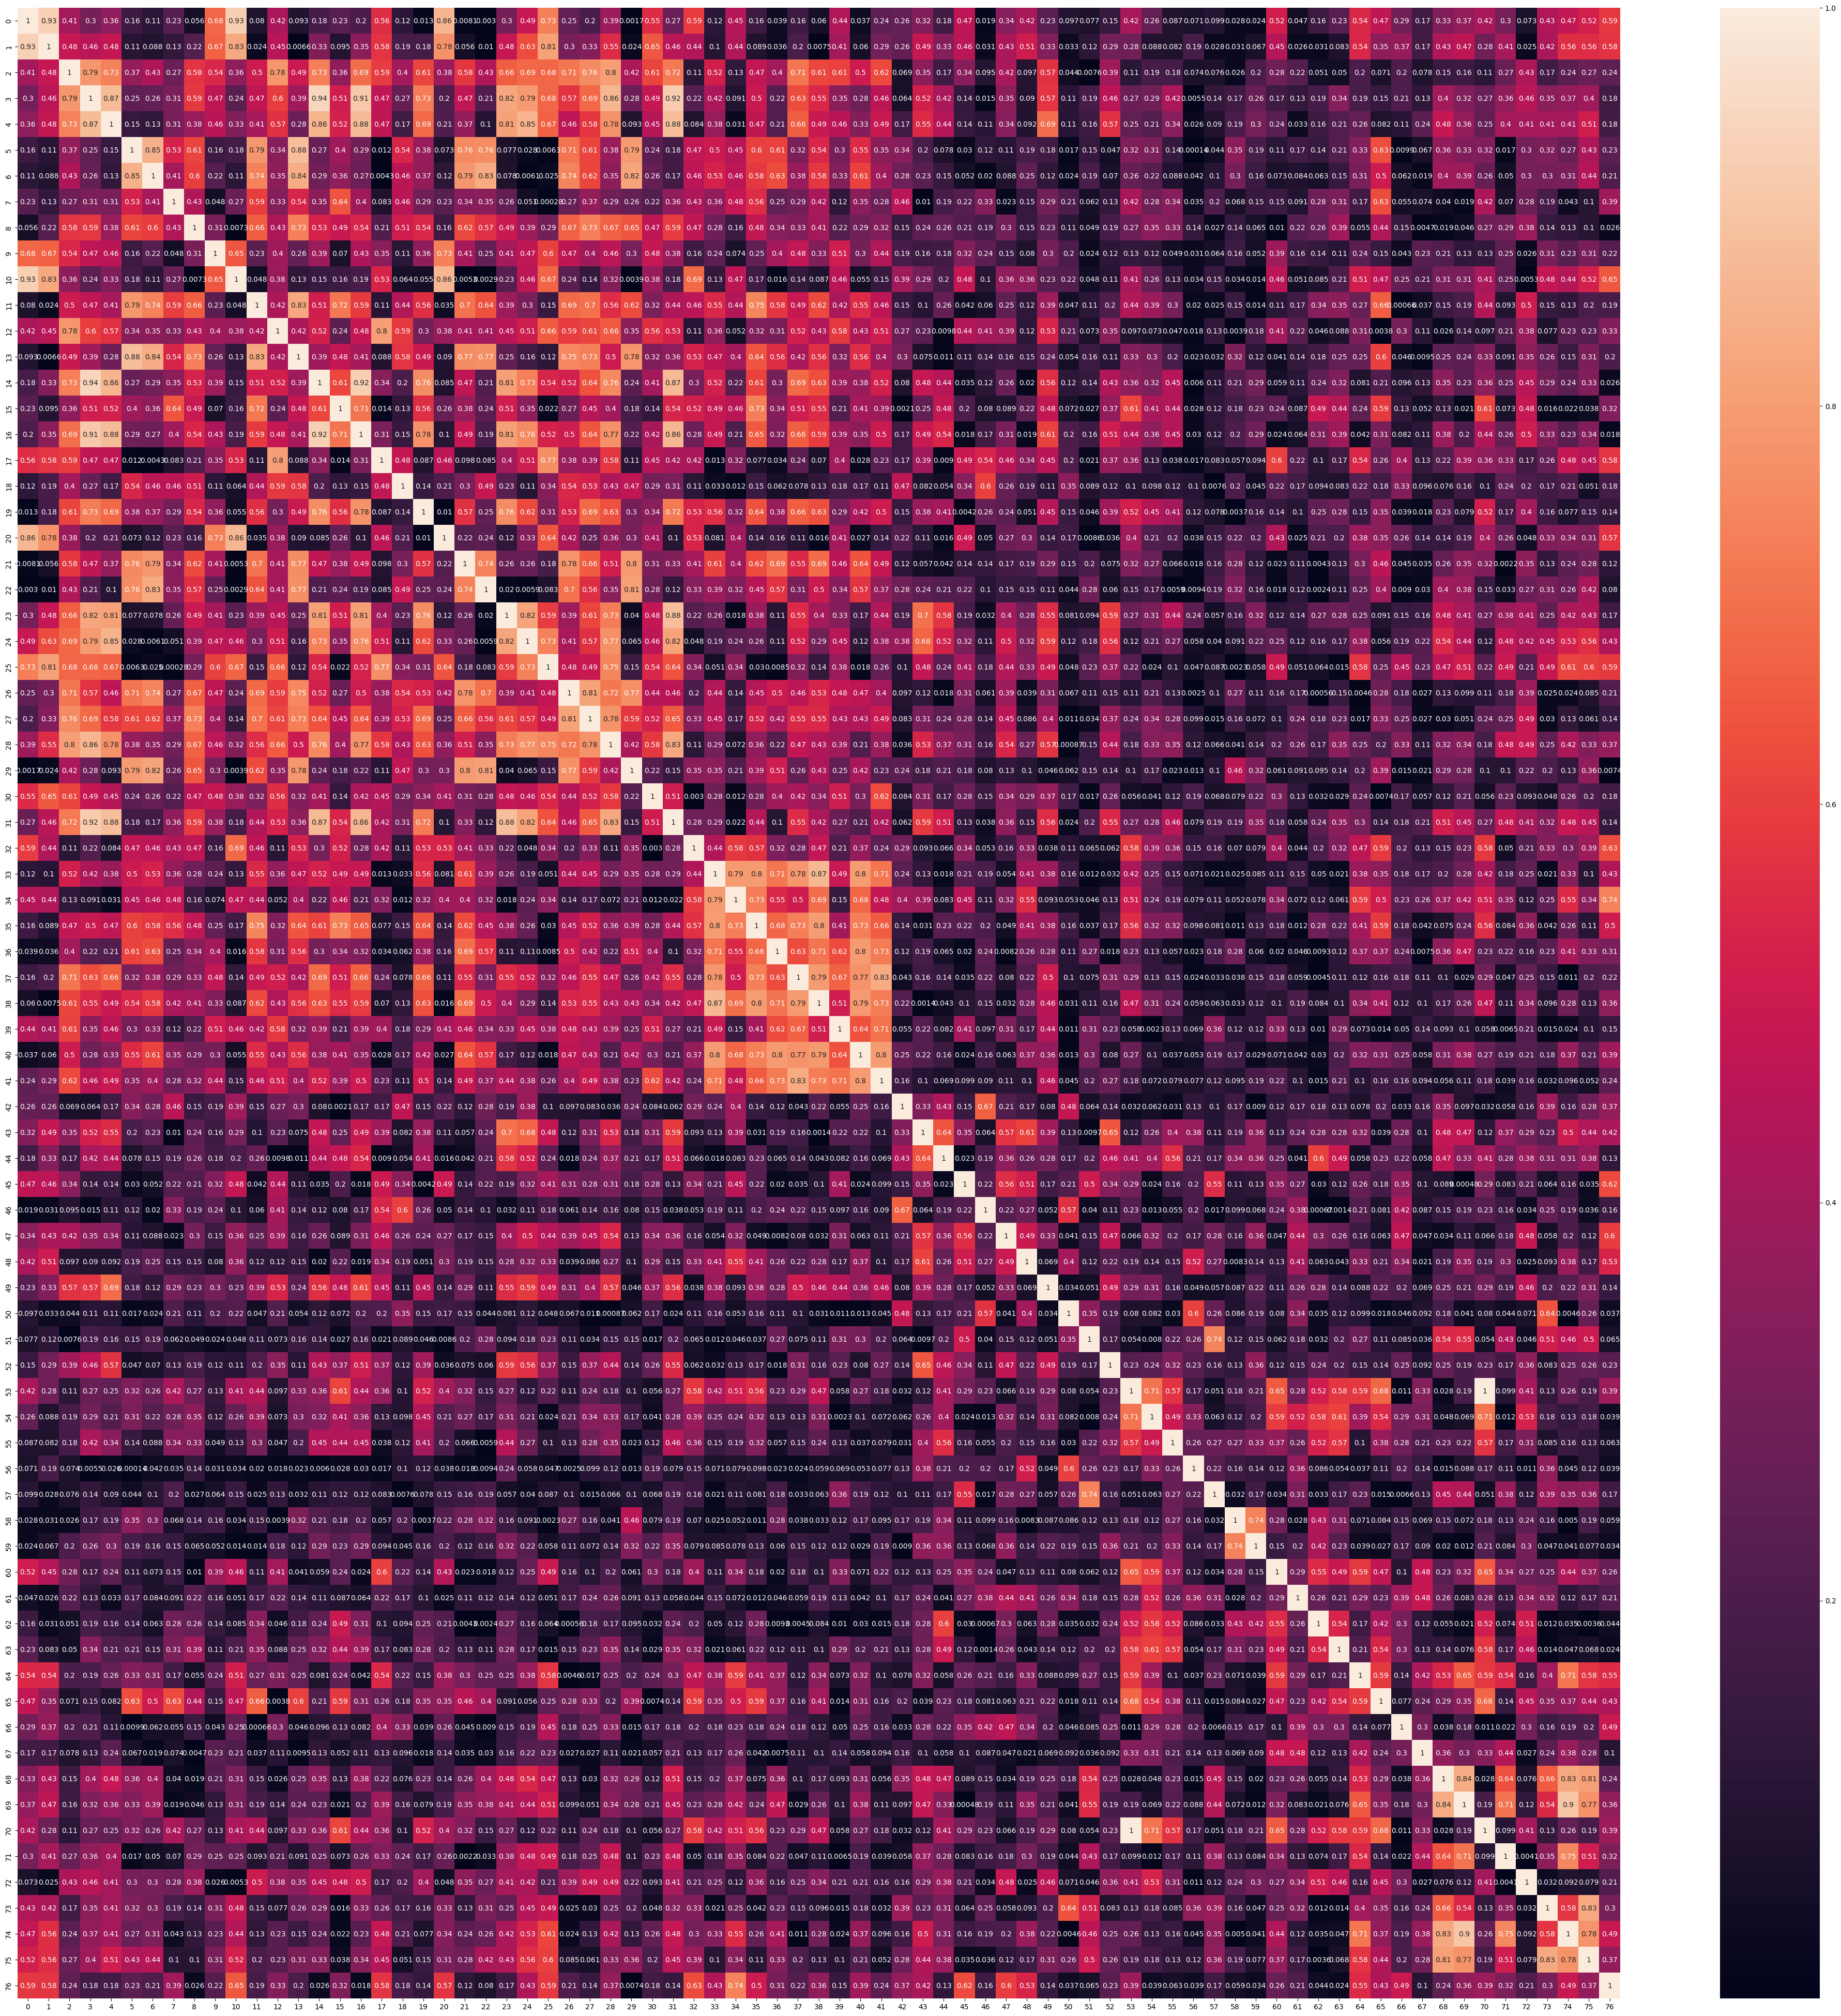

In [37]:
scaler = preprocessing.StandardScaler() #Zero mean and unit variance normalization
scaler.fit(mice.iloc[:, :-1]) #Applying the normalization
x_mice=pd.DataFrame(scaler.transform(mice.iloc[:, :-1])) #Normalizing all columns except the last column(genotype) as it needs to remain discrete
y_mice=pd.DataFrame(mice['Genotype']) #Seperating the target column
display(x_mice) #Display the normalized features
print('Mean values of the columns')
print(x_mice.mean()) #Mean would be very close to 0

corrMatrix = x_mice.corr(method='spearman') #Correlation between the features
fig, ax = plt.subplots(figsize=(50,50)) #Plotting the correlation
sns.heatmap((abs(corrMatrix)), annot=True)
plt.show()

As we can see the mean values of the columns are very close to 0 (10^-16 ,10^-17....)

Also no feature pair has correlation greater than 0.9, so I will not be dropping any features

Q2(c)

(i)

In the next 2 cells I will be training and validating the train and val data respectively on different values of estimators and max depth, which are hyperparameters for the Random Forest Classifier, and then test on the best hyper-parameter pair

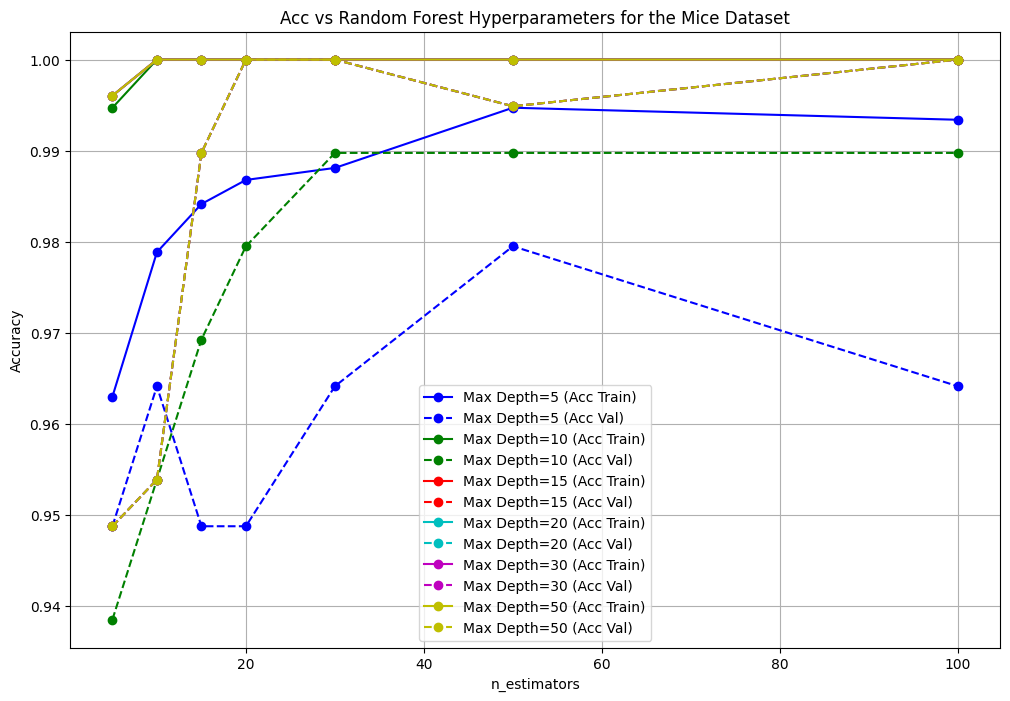

In [38]:
param_grid = {'n_estimators': [5,10,15,20,30,50,100], #Dictionary with the values of number of estimators to validate
              'max_depth': [5,10,15,20,30,50]} #Values of max depth to validate

X_train, X_vt, y_train, y_vt = train_test_split(x_mice, y_mice['Genotype'], test_size=0.3, random_state=42)  #Splitting data into train and val+test
X_test, X_val, y_test, y_val = train_test_split(X_vt, y_vt, test_size=0.6, random_state=42) #Splitting rest data into test and val
#Train=70%, Val=0.6*0.3=18%, Test=30-18=12%

val_acc = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Val accuracies for different params
train_acc = {max_depth: [] for max_depth in param_grid['max_depth']}  #Dictionary for storing Train accuracies for different params

for n_estimators in param_grid['n_estimators']: #Iterate over different values of number of estimators
    for max_depth in param_grid['max_depth']: #Iterate over different values of max depth
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42) #Define RFC with those hyper-params
        rf.fit(X_train, y_train) #Train the RFC on training data
        y_pred_train = rf.predict(X_train) #Make predictions on training data
        y_pred_val = rf.predict(X_val) #Make predictions on validation data
        val_acc[max_depth].append(accuracy_score(y_val, y_pred_val)) #Store the train accuracies
        train_acc[max_depth].append(accuracy_score(y_train, y_pred_train)) #Store the val accuracies

#Plot
colors = ['b', 'g', 'r', 'c', 'm', 'y'] #Define colors for lines of different max depth
plt.figure(figsize=(12, 8))
for i, max_depth in enumerate(param_grid['max_depth']):
    plt.plot(param_grid['n_estimators'], train_acc[max_depth], marker='o', color=colors[i], label=f'Max Depth={max_depth} (Acc Train)') #Plot for train acc
    plt.plot(param_grid['n_estimators'], val_acc[max_depth], marker='o', linestyle='dashed', color=colors[i], label=f'Max Depth={max_depth} (Acc Val)') #Plot for val acc
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('Acc vs Random Forest Hyperparameters for the Mice Dataset')
plt.legend()
plt.grid(True)
plt.show()

From the plot we can see that :

(i) Low values of max depth lead to lower train and val accuracy as compared to others, but I won't be calling this underfitting as the train acc is around 96-98% which is not bad.

(ii) High values of max depth lead to higher train but may give lower val accuracy due to overfitting.

So we will be using that set of hyper-param which gives the best val acc

In [39]:
accuracy=0 #Initialising acc with 0 and change it every time the acc>current acc
n_estimators=100 #Initialising n_estimators with max value in param grid and change it every time the acc>current acc
max_depth = 50 #Initialising max depth with max value in param grid and change it every time the acc>current acc

for max_d in param_grid['max_depth']: #Iterate over all values of max depth then update
    for i, acc in enumerate(val_acc[max_d]): #Iterate over the dictionary storing the val accuracies
        if acc > accuracy: #If new val acc>previous best val acc
            accuracy=acc #Update best accuracy
            n_estimators=param_grid['n_estimators'][i] #Update n_estimators
            max_depth=max_d #Update best max depth

print("Max Acc value:", accuracy)
print("Corresponding n_estimators:", n_estimators)
print("Corresponding max_depth:", max_depth)

best_rf=RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42) #Define a RFC with the hyper-params which gave the best val acc on val data
best_rf.fit(X_train, y_train) #Train that RFC on train data
y_pred_test=best_rf.predict(X_test) #Make predictions on test data
print("Test Acc = ",accuracy_score(y_test, y_pred_test)) #Print the accuracy on test data

Max Acc value: 1.0
Corresponding n_estimators: 20
Corresponding max_depth: 15
Test Acc =  0.9844961240310077


Here we can see that moderate values of n-estimators(20) and max depth(15) gives the best val acc(=100%)
When tested on this pair of hyper-param, we get a test accuracy of 98.44961240310077%

(ii)

Now we will repeat the same for SVC with RBF kernel by varying C and gamma

In the next 2 cells I will be training and validating the train and val data respectively on different values of C and gamma, which are hyperparameters for the Support Vector Classifier, and then test on the best hyper-parameter pair

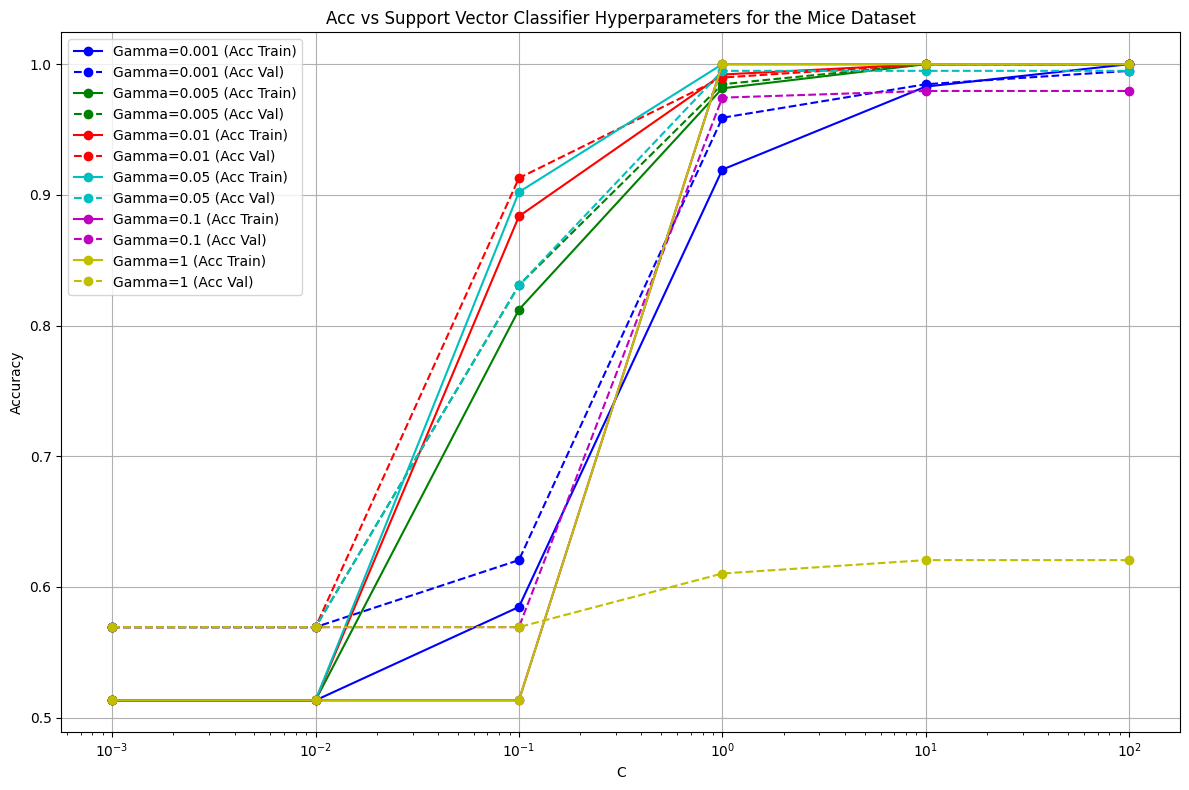

In [40]:
param_grid = {'C': [0.001,0.01,0.1, 1, 10, 100],  #Dictionary with the values of C to validate
              'gamma': [0.001,0.005,0.01,0.05, 0.1, 1]}  #Dictionary with the values of gamma to validate

val_acc = {gamma: [] for gamma in param_grid['gamma']}   #Dictionary for storing Val accuracies for different params
train_acc = {gamma: [] for gamma in param_grid['gamma']}   #Dictionary for storing Train accuracies for different params

for C in param_grid['C']:  #Iterate over different values of C
    for gamma in param_grid['gamma']:  #Iterate over different values of gamma
        svc = SVC(kernel='rbf', C=C, gamma=gamma)  #Define SVC with RBF Kernel having those hyper-params
        svc.fit(X_train, y_train)  #Train the RFC on training data
        y_pred_train = svc.predict(X_train)  #Make predictions on training data
        y_pred_val = svc.predict(X_val)  #Make predictions on validation data
        val_acc[ gamma].append(accuracy_score(y_val, y_pred_val))  #Store the train accuracies
        train_acc[ gamma].append(accuracy_score(y_train, y_pred_train))  #Store the val accuracies

#Plot
colors = ['b', 'g', 'r', 'c', 'm', 'y']  #Define colors for lines of different gamma
plt.figure(figsize=(12, 8))
for i, gamma in enumerate(param_grid['gamma']):
    plt.plot(param_grid['C'], train_acc[gamma], marker='o', color=colors[i], label=f'Gamma={gamma} (Acc Train)')  #Plot for train acc
    plt.plot(param_grid['C'], val_acc[gamma], marker='o', linestyle='dashed', color=colors[i], label=f'Gamma={gamma} (Acc Val)')  #Plot for val acc
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Acc vs Support Vector Classifier Hyperparameters for the Mice Dataset')
plt.legend()
plt.xscale('log')
plt.grid(True)
plt.tight_layout()
plt.show()

From the plot we can see that :

(i) Low values of gamma and C lead to lower train and val accuracy as compared to others(underfitting)

(ii) High values of gamma and C lead to higher train but may give lower val accuracy due to overfitting.

So we will be using that set of hyper-param which gives the best val acc

In [41]:
accuracy=0 #Initialising acc with 0 and change it every time the acc>current acc
c=100  #Initialising C with max value in param grid and change it every time the acc>current acc
gamma = 1  #Initialising gamma with max value in param grid and change it every time the acc>current acc

for g in param_grid['gamma']:  #Iterate over all values of gamma
    for i, acc in enumerate(val_acc[g]):  #Iterate over the dictionary storing the val accuracies
        if acc > accuracy:  #If new val acc>previous best val acc then update
            accuracy=acc  #Update best accuracy
            c=param_grid['C'][i]  #Update C
            gamma=g  #Update gamma

print("Max Acc value:", accuracy)
print("Corresponding C:", c)
print("Corresponding gamma:", gamma)

best_svc = SVC(kernel='rbf', C=c, gamma=gamma)  #Define a SVC with RBF kernel with the hyper-params which gave the best val acc on val data
best_svc.fit(X_train, y_train)  #Train that RFC on train data
y_pred_test=best_svc.predict(X_test)  #Make predictions on test data
print("Test Acc = ",accuracy_score(y_test, y_pred_test))  #Print the accuracy on test data

Max Acc value: 1.0
Corresponding C: 10
Corresponding gamma: 0.005
Test Acc =  0.9922480620155039


Here we can see that moderate values of gamma(0.05) and C(10) gives the best val acc(=100%).
When tested on this pair of hyper-param, we get a test accuracy of 99.22480620155039%

Q2(d)

Till now we have used all the 77 protein values as features for the model, but not all of them might be useful. So we will be using Recursive Feature Elimination to eliminate some features systematically such that our model performs well

For that, first we have to repeat some steps which we had done earlier as the previous df had been modifed for Q2(c)

In [42]:
mice = pd.read_excel('mice/Data_Cortex_Nuclear.xls') #Reading the Mice Excel File
columns_to_impute = mice.columns[mice.isnull().any()].tolist() #Finding columns with missing values
imputer = IterativeImputer()  #Defining a Multivariate Feature Imputer
imputed_data = imputer.fit_transform(mice[columns_to_impute])  #Fitting the imputer on those columns
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)  #Converting the imputed data as a df
mice[columns_to_impute] = imputed_df  #Replacing the imputed columns in the original df
mice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1080 non-null   float64
 2   ITSN1_N          1080 non-null   float64
 3   BDNF_N           1080 non-null   float64
 4   NR1_N            1080 non-null   float64
 5   NR2A_N           1080 non-null   float64
 6   pAKT_N           1080 non-null   float64
 7   pBRAF_N          1080 non-null   float64
 8   pCAMKII_N        1080 non-null   float64
 9   pCREB_N          1080 non-null   float64
 10  pELK_N           1080 non-null   float64
 11  pERK_N           1080 non-null   float64
 12  pJNK_N           1080 non-null   float64
 13  PKCA_N           1080 non-null   float64
 14  pMEK_N           1080 non-null   float64
 15  pNR1_N           1080 non-null   float64
 16  pNR2A_N          1080 non-null   float64
 17  pNR2B_N       

c:\Users\SHOUNAK DAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [43]:
mice

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0     0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1     0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2     0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3     0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4     0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   
...        ...        ...       ...  ...       ...       ...        ...   
1075  0.171262   2.483740  0.207317  ...  0.183324  0.374088   0.318782   
1076  0.182496   2.512737  0.216339  ...  0.175674  0.375259   0.325639   
1077  0.161435   1.989723  0.185164  ...  0.158296  0.422121   0.321306   
1078  0.173623   2.086028  0.192044  ...  0.196296  0.397676   0.335936   
1079  0.191811   2.361816  0.223632  ...  0.187556  0.420347   0.335062   

        EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0     0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1     0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2     0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3     0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4     0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  
...        ...       ...       ...       ...        ...       ...     ...  
1075  0.204660  0.328327  1.364823    Ts65Dn     Saline       S/C  t-SC-s  
1076  0.200415  0.293435  1.364478    Ts65Dn     Saline       S/C  t-SC-s  
1077  0.229193  0.355213  1.430825    Ts65Dn     Saline       S/C  t-SC-s  
1078  0.251317  0.365353  1.404031    Ts65Dn     Saline       S/C  t-SC-s  
1079  0.252995  0.365278  1.370999    Ts65Dn     Saline       S/C  t-SC-s  

[1080 rows x 82 columns]

Now we have prepared our df, we just need to seperate some columns, normalise them and fit RFECV on it, which recursively eliminates some features based on their cross-validation accuracy

In [44]:
X = mice.drop(columns=['MouseID','Genotype','Treatment','Behavior','class']) #Dropping these columns from train data 
y = mice['class'] #Target Column
scaler = preprocessing.StandardScaler() #Zero mean and unit variance normalization
scaler.fit(X) #Applying the normalization
X=pd.DataFrame(scaler.transform(X)) #Normalizing all columns of X

rfc = RandomForestClassifier(n_estimators=20,max_depth=15, random_state=42) #Defining a RFC with the best hyper-parameters which we found while validating
rfecv = RFECV(estimator=rfc, step=4, cv=5, scoring='accuracy')  # Using Recursive feature elimination on the RFC by removing 2 features at a step 
                                                                #by comparing average accuracy on 5-fold cross-validation

X_reduced = rfecv.fit_transform(X, y) #Fit the RFECV on our data of features
print("Optimal number of features : %d" % rfecv.n_features_) #Optimal number of features
print(rfecv.support_) # Will return true for those features which are being used and false for those which are to be dropped
used_features=[] # Array for storing names of features which are being used
for i in range(len(X.columns)): # Iterate over all the features
    if rfecv.support_[i]==True: # If True, feature is being used
        used_features.append(mice.drop(columns=['MouseID','Genotype','Treatment','Behavior','class']).columns[i]) #Add that feature
print("Used features = ",used_features)

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.25, random_state=42) # Train test split on reduced features

rfc.fit(X_train, y_train) #Training the Random Forest Classifier

y_pred = rfc.predict(X_test) #Predict on test data
accuracy = accuracy_score(y_test, y_pred) #Accuracy on Test Data
print("Accuracy:", accuracy)

Optimal number of features : 37
[ True  True False False False False False  True False False  True  True
  True False False  True False  True  True  True  True False False False
 False False False False False False  True False  True  True  True False
  True False  True  True False False  True  True False  True  True False
  True False  True  True False  True False  True  True False False False
  True False  True  True False  True  True False False False  True False
  True  True False False  True]
Used features =  ['DYRK1A_N', 'ITSN1_N', 'pCAMKII_N', 'pERK_N', 'pJNK_N', 'PKCA_N', 'pNR2A_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N', 'BRAF_N', 'APP_N', 'SOD1_N', 'MTOR_N', 'P38_N', 'DSCR1_N', 'NR2B_N', 'pNUMB_N', 'pP70S6_N', 'NUMB_N', 'pGSK3B_N', 'pPKCG_N', 'S6_N', 'AcetylH3K9_N', 'RRP1_N', 'ARC_N', 'nNOS_N', 'Tau_N', 'IL1B_N', 'pCASP9_N', 'PSD95_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'pS6_N', 'SYP_N', 'H3AcK18_N', 'CaNA_N']
Accuracy: 0.9888888888888889


We can clearly see that the accuracy has improved from the previous accuracy(which was 0.9844961240310077)

This might be because of the high correlation in some feature-pairs which has been removed now

Q3(a)

In this section I just used the code given on the link in Q3 for using ConvNet as a feature extractor from images

Block for importing libraries

In [45]:
# License: BSD
# Author: Sasank Chilamkurthy

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()   # interactive mode

Block for loading and transforming the image dataset

In [46]:
# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
data_dir = 'hymenoptera_data/hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

Block for visualising few images

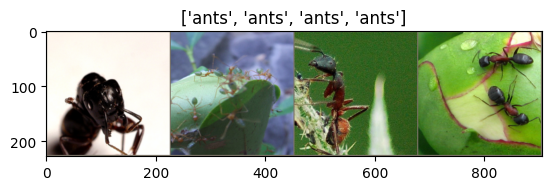

In [47]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Function to train the model

In [48]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path))
    return model

Function to display predictions for a few images

In [49]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Freezing all the layers except the final layer to extract features

In [50]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

Training & Evaluating

In [51]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=5)

Epoch 0/4
----------
train Loss: 0.6760 Acc: 0.6189
val Loss: 0.2304 Acc: 0.9346

Epoch 1/4
----------
train Loss: 0.5660 Acc: 0.7377
val Loss: 0.2395 Acc: 0.9346

Epoch 2/4
----------
train Loss: 0.5164 Acc: 0.7664
val Loss: 0.2117 Acc: 0.9346

Epoch 3/4
----------
train Loss: 0.5119 Acc: 0.7992
val Loss: 0.1941 Acc: 0.9346

Epoch 4/4
----------
train Loss: 0.6097 Acc: 0.7336
val Loss: 0.2366 Acc: 0.9346

Training complete in 1m 36s
Best val Acc: 0.934641


See predictions visually

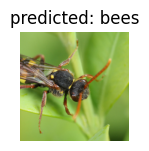

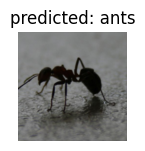

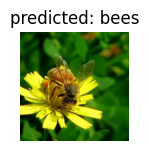

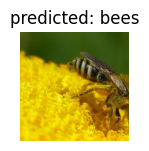

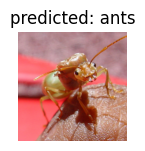

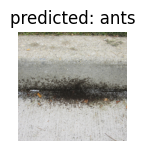

In [52]:
visualize_model(model_conv)

plt.ioff()
plt.show()

Using the trained model to make predictions on custom image

In [53]:
def visualize_model_predictions(model,img_path):
    was_training = model.training
    model.eval()

    img = Image.open(img_path)
    img = data_transforms['val'](img)
    img = img.unsqueeze(0)
    img = img.to(device)

    with torch.no_grad():
        outputs = model(img)
        _, preds = torch.max(outputs, 1)

        ax = plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'Predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])

        model.train(mode=was_training)

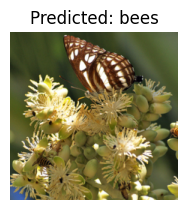

In [54]:
visualize_model_predictions(
    model_conv,
    img_path='hymenoptera_data/hymenoptera_data/val/bees/72100438_73de9f17af.jpg'
)

plt.ioff()
plt.show()

Q3(b)

In [55]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16, shuffle=True, num_workers=4) for x in ['train', 'val']} #Using the dataloader from Q3(a)
device="cuda"
def feature(dataloader): #Defining the function for extractinf features using ResNet18
    model = models.resnet18(pretrained=True) #Initialising the pre-trained ResNet18 model
    model = torch.nn.Sequential(*list(model.children())[:-1]) #Removing the last layer(fully connected layer)
    model.to(device) #Using Laptop's GPU for training the model
    model.eval() #Using evaluation mode for feature extraction so that we don't compute gradient
    all_features = [] #List for storing features
    all_labels=[] #List for storing actual labels of images
    for images, labels in dataloader: #Iterate through the data loader
        with torch.no_grad():
            images=images.to(device) #Move images to GPU
            features = model(torch.tensor(images)) #Extract features
        features = features.view(features.size(0),-1) #Flatten the features except for the batch dim
        labels=labels.flatten() #Flatten the labels
        all_features.append(features.cpu().numpy()) #Storing features arrays
        all_labels.append(labels.numpy()) #Storing image labels
    all_features = np.concatenate(all_features, axis=0) #Concatenating to get a single array
    all_labels = np.concatenate(all_labels, axis=0) #Concatenating to get a single array
    return all_features,all_labels

print(len(image_datasets['train'])) #Length of train dataset

features_train,labels_train=feature(dataloaders['train']) #Extracting features from the training data
print(features_train.shape) #Shape of Features

244


c:\Users\SHOUNAK DAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\SHOUNAK DAS\AppData\Local\Programs\Python\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\SHOUNAK DAS\AppData\Local\Temp\ipykernel_1880\1769445349.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features = model(torch.tenso

(244, 512)


We can see that it returns an array of shape 244,512 as there are 244 images in train dataset and each image's feature is an array of size 512

Q3(c)

In [56]:
X_train,y_train=feature(dataloaders['train']) #Using dataloader of 3a and the function created in 3c to get train dataset
X_test,y_test=feature(dataloaders['val']) #Using dataloader of 3a and the function created in 3c to get test dataset

# Grid search for SVM
svm_param_grid = {'C': [0.001,0.01,0.1,0.25,0.5,0.75, 1, 10, 100],
                  'gamma': [0.0001, 0.001,0.005, 0.01,0.05, 0.1,0.5,1]} #Dictionary with values to try
svm_grid_search = GridSearchCV(SVC(kernel='rbf'), svm_param_grid, cv=5)  #SVM grid search on kernel width and regularization by comparing mean val acc on 5-fold cross-validation
svm_grid_search.fit(X_train, y_train) #Train on the model with best hyper-param pair
print("Best parameters for SVM:")
print(svm_grid_search.best_params_) #Print the best pair of kernel width and regularization
best_svm = svm_grid_search.best_estimator_ #Set SVC with those values

rf_param_grid = {'n_estimators': [50,60,70,80],
                 'max_depth': [5,8,10,12,15]} #Dictionary with values to try
rf_grid_search = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)   #Random Forest grid search on max depth and number of trees by comparing mean val acc on 5-fold cross-validation
rf_grid_search.fit(X_train, y_train) #Train on the model with best hyper-param pair

print("\nBest parameters for Random Forest:")
print(rf_grid_search.best_params_) #Print the best pair of max depth and number of tree
best_rf = rf_grid_search.best_estimator_  #Set Random Forest with those values

svm_predictions = best_svm.predict(X_test) #Predictions on test data using best SVM
rf_predictions = best_rf.predict(X_test) #Predictions on test data using best Random Forest

svm_accuracy = accuracy_score(y_test, svm_predictions) #SVM Test Accuracy
svm_f1_score = f1_score(y_test, svm_predictions, average='weighted') #SVM F1 Score

rf_accuracy = accuracy_score(y_test, rf_predictions) #Random Forest Test Accuracy
rf_f1_score = f1_score(y_test, rf_predictions, average='weighted') #Random Forest F1 Score

print("\nSVM Accuracy:", svm_accuracy)
print("SVM F1 Score:", svm_f1_score)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1_score)

C:\Users\SHOUNAK DAS\AppData\Local\Temp\ipykernel_1880\1769445349.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  features = model(torch.tensor(images)) #Extract features


Best parameters for SVM:
{'C': 0.75, 'gamma': 0.005}

Best parameters for Random Forest:
{'max_depth': 10, 'n_estimators': 70}

SVM Accuracy: 0.9607843137254902
SVM F1 Score: 0.9608213604919811
Random Forest Accuracy: 0.9411764705882353
Random Forest F1 Score: 0.9412521797942224


We see that SVM tends to perform better than Random Forests in this case.

Also Random forests take longer time in training as they use many trees for prediction and thus computation becomes expensive

References:

(i)Multivariate feature imputation (https://scikit-learn.org/stable/modules/impute.html)

(ii)Recursive feature elimination (https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html)

(iii)https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

(iv)Prof. Amit Sethi's code on data visualisation and pre-processing

(v)https://scikit-learn.org/stable/modules/permutation_importance.html

(vi)https://numpy.org/doc/stable/reference/generated/numpy.clip.html

(vii)ChatGPT - Codes for generating histograms,box plots, correlation heatmaps, line graphs and creating sliders and buttons on streamlit